# Figures and model analyses for Loell et al 2023.

Necessary directories:

`./data_files/`

`./saved_models/`

`./bootstrapped_models/`

Use this notebook to recreate all paper figures from the original files. This notebook can also be used to perform additional analyses on the saved models. See MAVE-NN documentation for instructions on how to work with model files at https://mavenn.readthedocs.io/.

In [2]:
%matplotlib inline
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random
import pickle
import scipy.stats
import mavenn
import logomaker

# Figure 1B 

Plot of a subset of data from White, et al., Cell Reports 2016 Oct 25;17(5):1247-1254 (https://doi.org/10.1016/j.celrep.2016.09.066). Sequences with only high affinity CRX binding sites and 0 or 1 NRL site were extracted from supplementary file `Data S3` of that paper and saved in `data_files/fig1b_data.csv`. Sequences with only NRL sites were extracted and saved in `data_files/figs1.nrl.csv`.

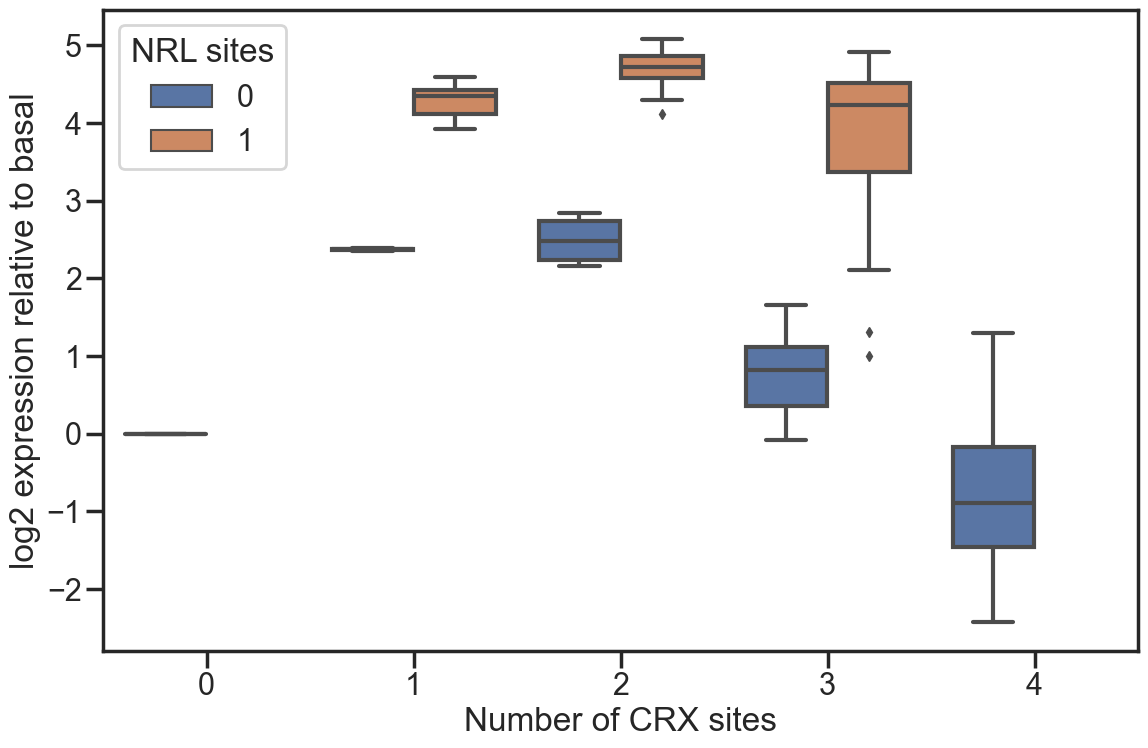

In [2]:
fig1b_df = pd.read_csv('data_files/fig1b_data.csv', sep = ",", header = 0, index_col = 0)
sns.set_theme(style="ticks")
sns.set_context('poster')
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data = fig1b_df, x="CRX_motif", y = "log2_expr", hue = "NRL_motif")
ax.set(xlabel = 'Number of CRX sites', ylabel = 'log2 expression relative to basal' )
#sns.despine(trim=True)
plt.tight_layout()
plt.legend(title='NRL sites', loc = 'upper left')
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
fig.savefig('fig1b.box.tif', dpi=300, format='tif', bbox_inches = 'tight')

# Figure S1 Replot of synthetic promoter data NRL sites

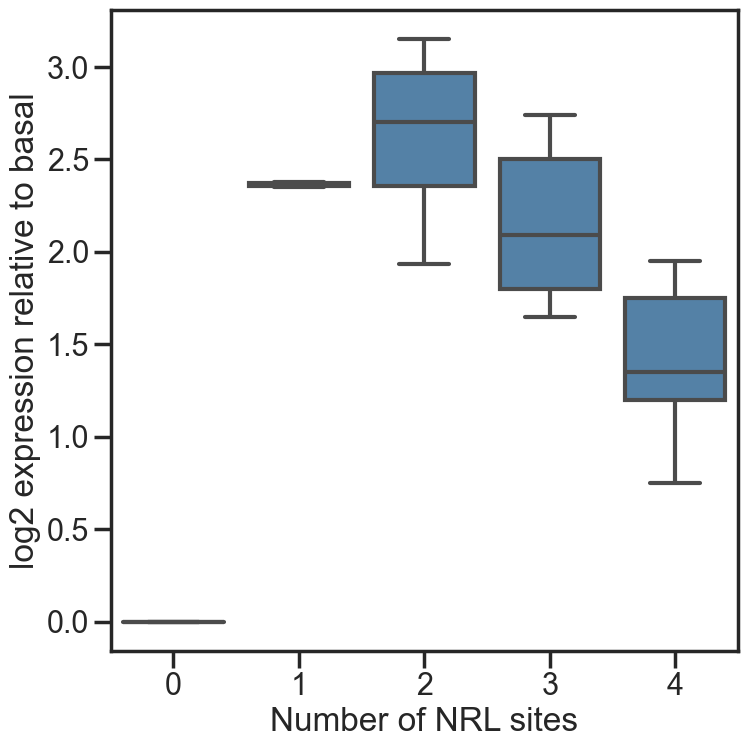

In [3]:
figs1_df = pd.read_csv('data_files/figs1.nrl.csv', sep = ",", header = 0, index_col = 0)

sns.set_theme(style="ticks")
sns.set_context('poster')
fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(data = figs1_df, x="NRL_motif", y = "log2_expr", color = 'steelblue' )
ax.set(xlabel = 'Number of NRL sites', ylabel = 'log2 expression relative to basal' )
plt.tight_layout()

fig.savefig('figS1.box.tif', dpi=300, format='tif', bbox_inches = 'tight')

# CRX + NRL library in wild-type retina: Load model files

As derscribed in the paper, MAVE-NN models were trained on `Data S3` from White, et al. (2016), cited above. Modeling results from multuiple random starts are in `saved_models/` with filenames beginning with `all_promoters_`.

In [2]:
# Iterate over types of G-P maps
gpmap_types = ['additive','neighbor','pairwise','blackbox']

# Create list of model names|
model_names = [f'all_promoters_{gpmap_type}_ge_{i}' for gpmap_type in gpmap_types for i in range(25)]

# Load models into a dictionary indexed by model name
cn_model_dict = {name:mavenn.load('saved_models/' + name) for name in model_names}

Model loaded from these files:
	saved_models/all_promoters_additive_ge_0.pickle
	saved_models/all_promoters_additive_ge_0.h5
Model loaded from these files:
	saved_models/all_promoters_additive_ge_1.pickle
	saved_models/all_promoters_additive_ge_1.h5
Model loaded from these files:
	saved_models/all_promoters_additive_ge_2.pickle
	saved_models/all_promoters_additive_ge_2.h5
Model loaded from these files:
	saved_models/all_promoters_additive_ge_3.pickle
	saved_models/all_promoters_additive_ge_3.h5
Model loaded from these files:
	saved_models/all_promoters_additive_ge_4.pickle
	saved_models/all_promoters_additive_ge_4.h5
Model loaded from these files:
	saved_models/all_promoters_additive_ge_5.pickle
	saved_models/all_promoters_additive_ge_5.h5
Model loaded from these files:
	saved_models/all_promoters_additive_ge_6.pickle
	saved_models/all_promoters_additive_ge_6.h5
Model loaded from these files:
	saved_models/all_promoters_additive_ge_7.pickle
	saved_models/all_promoters_additive_ge_7.h5


Model loaded from these files:
	saved_models/all_promoters_pairwise_ge_16.pickle
	saved_models/all_promoters_pairwise_ge_16.h5
Model loaded from these files:
	saved_models/all_promoters_pairwise_ge_17.pickle
	saved_models/all_promoters_pairwise_ge_17.h5
Model loaded from these files:
	saved_models/all_promoters_pairwise_ge_18.pickle
	saved_models/all_promoters_pairwise_ge_18.h5
Model loaded from these files:
	saved_models/all_promoters_pairwise_ge_19.pickle
	saved_models/all_promoters_pairwise_ge_19.h5
Model loaded from these files:
	saved_models/all_promoters_pairwise_ge_20.pickle
	saved_models/all_promoters_pairwise_ge_20.h5
Model loaded from these files:
	saved_models/all_promoters_pairwise_ge_21.pickle
	saved_models/all_promoters_pairwise_ge_21.h5
Model loaded from these files:
	saved_models/all_promoters_pairwise_ge_22.pickle
	saved_models/all_promoters_pairwise_ge_22.h5
Model loaded from these files:
	saved_models/all_promoters_pairwise_ge_23.pickle
	saved_models/all_promoters_pa

# Load file of synthetic CRSs binding sites and MPRA activity

In [3]:
# Load MPRA data file

Data = pd.read_csv("data_files/crx_nrl_library.txt", sep = '\t')

# Reencode binding site arrangements so that all sequences are the same length (use O to pad)
# and each binding site is one character
max_length = 4
Padded_sequences = []
for sequence in Data['synthetic_promoter']:
    if sequence == "basal_only":
        Padded_sequence = "OOOO"
    else:
        Padded_sequence = "".join(['O']*(max_length - len(sequence)))
        for site in sequence:
            Padded_sequence = Padded_sequence + site
    Padded_sequences.append(Padded_sequence)
Data['synthetic_promoter'] = Padded_sequences
Sequence = np.concatenate([Data['synthetic_promoter'] + "P",  
                     Data['synthetic_promoter'] + "H"])
Expression = np.concatenate([np.log(Data["Rho_basal_wt"]),   
          np.log(Data["hsp68_basal_wt"])])
cn_data_bypromoter = pd.DataFrame({'Sequence': Sequence, 'Expression': Expression})
cn_data_bypromoter

,Sequence,Expression
0,OOOOP,-2.216311
1,OOOcP,-0.581550
2,OOOCP,-0.560967
3,OOOnP,-0.586571
4,OOONP,-0.568978
...,...,...
2577,xxXxH,-2.797773
2578,XXxxH,-2.415393
2579,XXxXH,-3.980350
2580,XXXxH,-3.668690


# Figure 2A Predictive Information

In [26]:
# Compute predictive information
# Predictive information varies slightly between runs


Data_file = open("saved_models/all_promoters_trainval.pkl", "rb")
cn_trainval_df = pickle.load(Data_file)
Data_file.close()

Data_file = open("saved_models/all_promoters_test.pkl", "rb")
cn_test_df = pickle.load(Data_file)
Data_file.close()


best_models = {'additive':'all_promoters_additive_ge_21', 'neighbor':'all_promoters_neighbor_ge_22', 
              'pairwise' : 'all_promoters_pairwise_ge_24', 'blackbox':'all_promoters_blackbox_ge_20' }

cn_info_df = pd.DataFrame(columns=['name', 'gpmap', 'metric', 'I', 'dI'], 
                          index = ["additive", "neighbor", "pairwise", "blackbox"])


for key in best_models.keys():
    name = best_models[key]
    gpmap_type = key
    model = cn_model_dict[name]
    I_pred, dI_pred = model.I_predictive(x=cn_test_df['Sequence'], y=cn_test_df['Expression'])
    row = {'name':name,
                    'gpmap':gpmap_type,
                    'metric':'Predictive information',
                    'I':I_pred,
                    'dI':dI_pred}
    cn_info_df.loc[key] = row


# for j in range(10):
#     # Fill out dataframe containing values to plot
#     # This dataframe will then be used by seaborn's barplot() function
#     for i in range(25):
#         for gpmap_type in gpmap_types:
#             # Get model
#             name = f'all_promoters_{gpmap_type}_ge_{i}'
#             model = cn_model_dict[name]
#             # Compute variational information on test data
#             #I_var, dI_var =  model.I_variational(x=test_df['Sequence'], y=test_df['Expression'])
#             #row = {'name':name,
#             #       'gpmap':gpmap_type,
#             #       'metric':'I_var',
#             #       'I':I_var,
#             #       'dI':dI_var}
#             #info_df = info_df.append(row, ignore_index=True)
#             # Compute predictive information on test data
#             I_pred, dI_pred = model.I_predictive(x=cn_test_df['Sequence'], y=cn_test_df['Expression'])
#             row = {'name':name,
#                     'gpmap':gpmap_type,
#                     'metric':'Predictive information',
#                     'I':I_pred,
#                     'dI':dI_pred}
#             if pd.isna(cn_info_df.loc[gpmap_type, "I"]) or I_pred > cn_info_df.loc[gpmap_type, "I"]:
#                 cn_info_df.loc[gpmap_type] = row
                
# Print dataframe
print('Contents of info_df:', cn_info_df, sep='\n')

Contents of info_df:
                                  name     gpmap                  metric  \
additive  all_promoters_additive_ge_21  additive  Predictive information   
neighbor  all_promoters_neighbor_ge_22  neighbor  Predictive information   
pairwise  all_promoters_pairwise_ge_24  pairwise  Predictive information   
blackbox  all_promoters_blackbox_ge_20  blackbox  Predictive information   

                 I        dI  
additive  0.731601  0.026853  
neighbor  1.113479  0.031561  
pairwise  1.815651  0.023684  
blackbox  2.999449  0.028786  


In [40]:
# predicitve info for all pairwise models
for i in range(25):
    name = f'all_promoters_pairwise_ge_{i}'
    model = cn_model_dict[name]
    I_pred, dI_pred = model.I_predictive(x=cn_test_df['Sequence'], y=cn_test_df['Expression'])
    print(i, I_pred, dI_pred)

0 1.8013450582129924 0.028211847987875825
1 0.09066010195345392 0.016634436609700258
2 1.7116760212465647 0.02153746250037919
3 1.7308362370720487 0.019624428049453156
4 1.775421640413379 0.02667492423593656
5 1.7016085419530793 0.025322747182337395
6 1.7436508216006719 0.02522855457142147
7 1.7232416417613328 0.02639358330474394
8 1.7762776592405576 0.020285171972254615
9 1.7688662084343665 0.020576617594275984
10 1.7913606954134245 0.02709417925292217
11 0.03085468079690098 0.016354011489118307
12 1.743554482759812 0.025332168753253746
13 1.7623607105507595 0.022414118765593093
14 1.7615632880528989 0.022935417947390284
15 1.7671280851535727 0.025140322625872888
16 1.7839414415916723 0.01671141820057351
17 1.7888101346294543 0.03446978496836645
18 1.7820406337320502 0.026065247850361017
19 1.7777602055931425 0.018510182610035862
20 0.017177902081621826 0.01600623459251049
21 1.7853208169321706 0.02779898895532473
22 1.7890103687425671 0.026607716805028436
23 0.06325197049979216 0.016

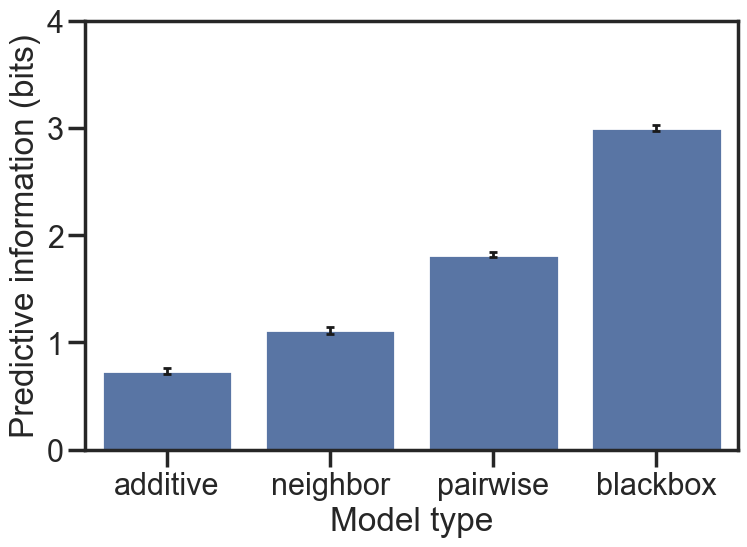

In [27]:
# Plot predictive information
# Create figure

fig, ax = plt.subplots(figsize=[8, 6])
# sns.set(rc={"figure.dpi":300, 'savefig.dpi':300}, font_scale = 1)
sns.set_theme(style = "ticks")
sns.set_context('poster')

# Plot bars
sns.barplot(ax=ax,
            data=cn_info_df,
            hue='metric',
            x='gpmap',
            y='I')

# Plot errorbars
x = np.array([[x] for x in range(4)]).ravel()
ax.errorbar(x=x,
            y=cn_info_df['I'].values,
            yerr=cn_info_df['dI'].values,
            color='k', capsize=3, linestyle='none',
            elinewidth=2, capthick=2, solid_capstyle='round')

#ax.axhline(3.5918093314085553, color='C3', linestyle=':',
#               label=r'Intrinsic information')


ax.set(xlabel = 'Model type', ylabel = 'Predictive information (bits)' )
# ax.set_ylabel('Predictive information (bits)', fontsize = 24, font = "Arial")
# ax.set_xlabel('Model type', fontsize = 24, font = "Arial")
ax.set_xlim([-.5, 3.5])
ax.set_ylim([0, 4])
#plt.title("CRX wild type test set", fontsize = 24)
plt.legend([],[], frameon=False)
#ax.legend()

plt.tight_layout()
fig.savefig('fig2a.predInfo.tif', dpi=300, format='tif', bbox_inches = 'tight')

# Fig 2B

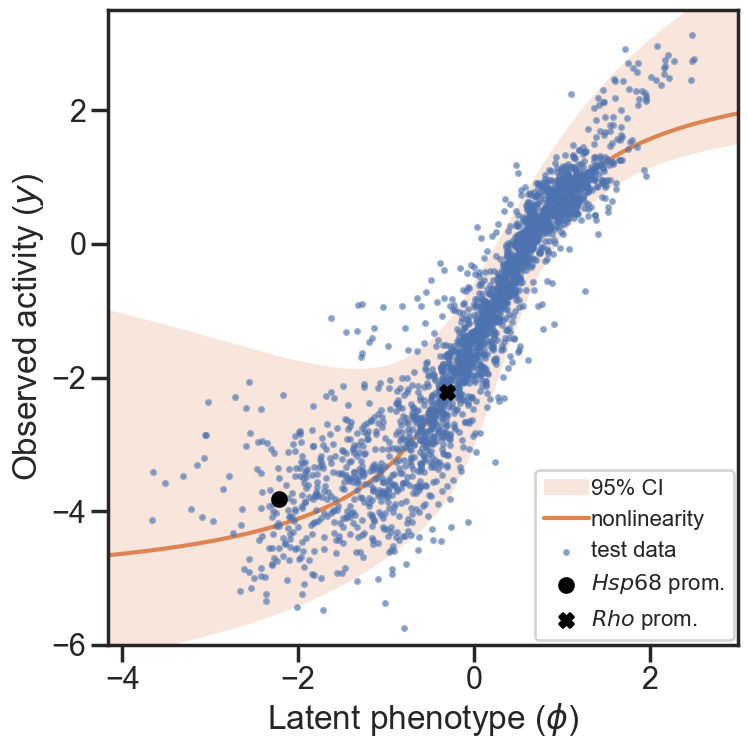

In [28]:
# Plot latent phenotype vs measured activity

#sns.set(font_scale = 1.5)
#sns.set_theme(style='white')

sns.set_theme(style="ticks")
sns.set_context('poster')

# Create figure and axes for plotting
fig, ax = plt.subplots(1,1,figsize=[8,8])
#axs = axs.ravel()

# Loop over models
#for ax, name in zip(axs, ['all_promoters_pairwise_ge']):

name = 'all_promoters_pairwise_ge_24'
# Get model
model = cn_model_dict[name]

# Get test data y values
y_test = cn_test_df['Expression']

# Compute phi on test data
phi_test = model.x_to_phi(cn_test_df['Sequence'])

## Set phi lims and create a grid in phi space
phi_lim = [min(phi_test)-.5, max(phi_test)+.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Compute yhat for each phi gridpoint
yhat_grid = model.phi_to_yhat(phi_grid)

# Compute 95% CI for each yhat
q = [0.025, 0.975]
yqs_grid = model.yhat_to_yq(yhat_grid, q=q)

# Plote 95% confidence interval
ax.fill_between(phi_grid, yqs_grid[:, 0], yqs_grid[:, 1],
                alpha=0.2, color='C1', lw=0, label='95% CI')

# Plot GE nonlinearity
ax.plot(phi_grid, yhat_grid,
        linewidth=3, color='C1', label='nonlinearity')

#scipy.stats.pearsonr(model.phi_to_yhat(phi_test), y_test)

# Plot scatter of phi and y values.
ax.scatter(phi_test, y_test,
            color='C0', s=10, alpha=0.5, label= 'test data', zorder=+100)

# Plot basal
ax.scatter(model.x_to_phi(cn_data_bypromoter['Sequence'][1291]), cn_data_bypromoter['Expression'][1291],
            color='black', marker = "o", s=100, alpha=1, label='$\it{Hsp68}$ prom.', zorder=+100)
ax.scatter(model.x_to_phi(cn_data_bypromoter['Sequence'][0]), cn_data_bypromoter['Expression'][0],
            color='black', marker = "X", s=100, alpha=1, label='$\it{Rho}$ prom.', zorder=+100)

# Style plot
ax.set_xlim(phi_lim)
ax.set_xlabel('Latent phenotype ($\phi$)')
ax.set_ylim([-6,3.5])
ax.set_ylabel('Observed activity ($y$)')
#ax.set_title(f'Pairwise model', fontsize = 48, font = "Arial")
#plt.legend(frameon = False)
ax.legend(loc='lower right', fontsize = 16, borderaxespad = 0.2, handletextpad=0.1)

fig.tight_layout()
fig.savefig('fig2b.cnNonlinearity.tif', dpi=300, format='tif', bbox_inches = 'tight')

# Figure 2C

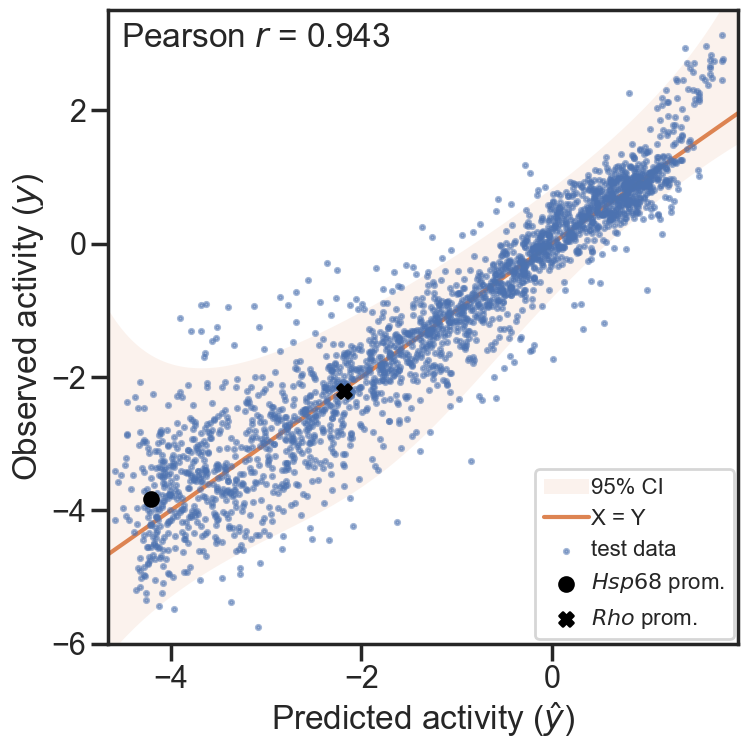

In [29]:
# Plot predicted vs measured activity

#sns.set(font_scale = 1.5)
#sns.set_theme(style='white')

sns.set_theme(style="ticks")
sns.set_context('poster')

# Create figure and axes for plotting
fig, ax = plt.subplots(1,1,figsize=[8,8])
#axs = axs.ravel()

# Loop over models
#for ax, name in zip(axs, ['all_promoters_pairwise_ge']):

name = 'all_promoters_pairwise_ge_24'
# Get model
model = cn_model_dict[name]

# Get test data y values
y_test = cn_test_df['Expression']

# Compute phi on test data
phi_test = model.x_to_phi(cn_test_df['Sequence'])

# Compute yhat for each test value
yhat_test = model.phi_to_yhat(phi_test)

## Set phi lims and create a grid in phi space
phi_lim = [min(phi_test)-.5, max(phi_test)+.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)
yhat_grid = model.phi_to_yhat(phi_grid)

# Compute 95% CI for each yhat
q = [0.025, 0.975]
yqs_grid = model.yhat_to_yq(yhat_grid, q=q)

# Plote 95% confidence interval
ax.fill_between(yhat_grid, yqs_grid[:, 0], yqs_grid[:, 1],
                alpha=0.1, color='C1', lw=0, label='95% CI')

# Plot x=y line
ax.plot(yhat_grid, yhat_grid,
        linewidth=3, color='C1', label='X = Y')

#scipy.stats.pearsonr(model.phi_to_yhat(phi_test), y_test)

# Plot scatter of phi and y values.
ax.scatter(yhat_test, y_test,
            color='C0', s=10, alpha=0.5, label= 'test data', zorder=+100)

# Plot basal
ax.scatter(model.phi_to_yhat(model.x_to_phi(cn_data_bypromoter['Sequence'][1291])), cn_data_bypromoter['Expression'][1291],
            color='black', marker = "o", s=100, alpha=1, label='$\it{Hsp68}$ prom.', zorder=+100)
ax.scatter(model.phi_to_yhat(model.x_to_phi(cn_data_bypromoter['Sequence'][0])), cn_data_bypromoter['Expression'][0],
            color='black', marker = "X", s=100, alpha=1, label='$\it{Rho}$ prom.', zorder=+100)

# Style plot
ax.set_xlim([min(yhat_grid), max(yhat_grid)])
ax.set_xlabel('Predicted activity ($y\u0302$)')
ax.set_ylim([-6,3.5])
ax.set_ylabel('Observed activity ($y$)')
#ax.set_title(f'CRX wt test set', fontsize = 48, font = "Arial")
ax.text(0.02,0.98, "Pearson $\it{r}$ = " + str(scipy.stats.pearsonr(yhat_test, y_test)[0])[0:5], ha="left", va="top", transform=ax.transAxes)

ax.legend(loc='lower right', fontsize = 16, borderaxespad = 0.2, handletextpad=0.1)

fig.tight_layout()
fig.savefig('fig2c.obsVpred.tif', dpi=300, format='tif', bbox_inches = 'tight')

# Figure S2D 

In [135]:
# Focus on pairwise model
model = cn_model_dict['all_promoters_pairwise_ge_24']

# Retrieve G-P map parameter dict and view dict keys
theta_dict = model.get_theta(gauge="user", x_wt = "OOOOH")
theta_dict.keys()

dict_keys(['L', 'C', 'alphabet', 'theta_0', 'theta_lc', 'theta_lclc', 'theta_mlp', 'logomaker_df'])

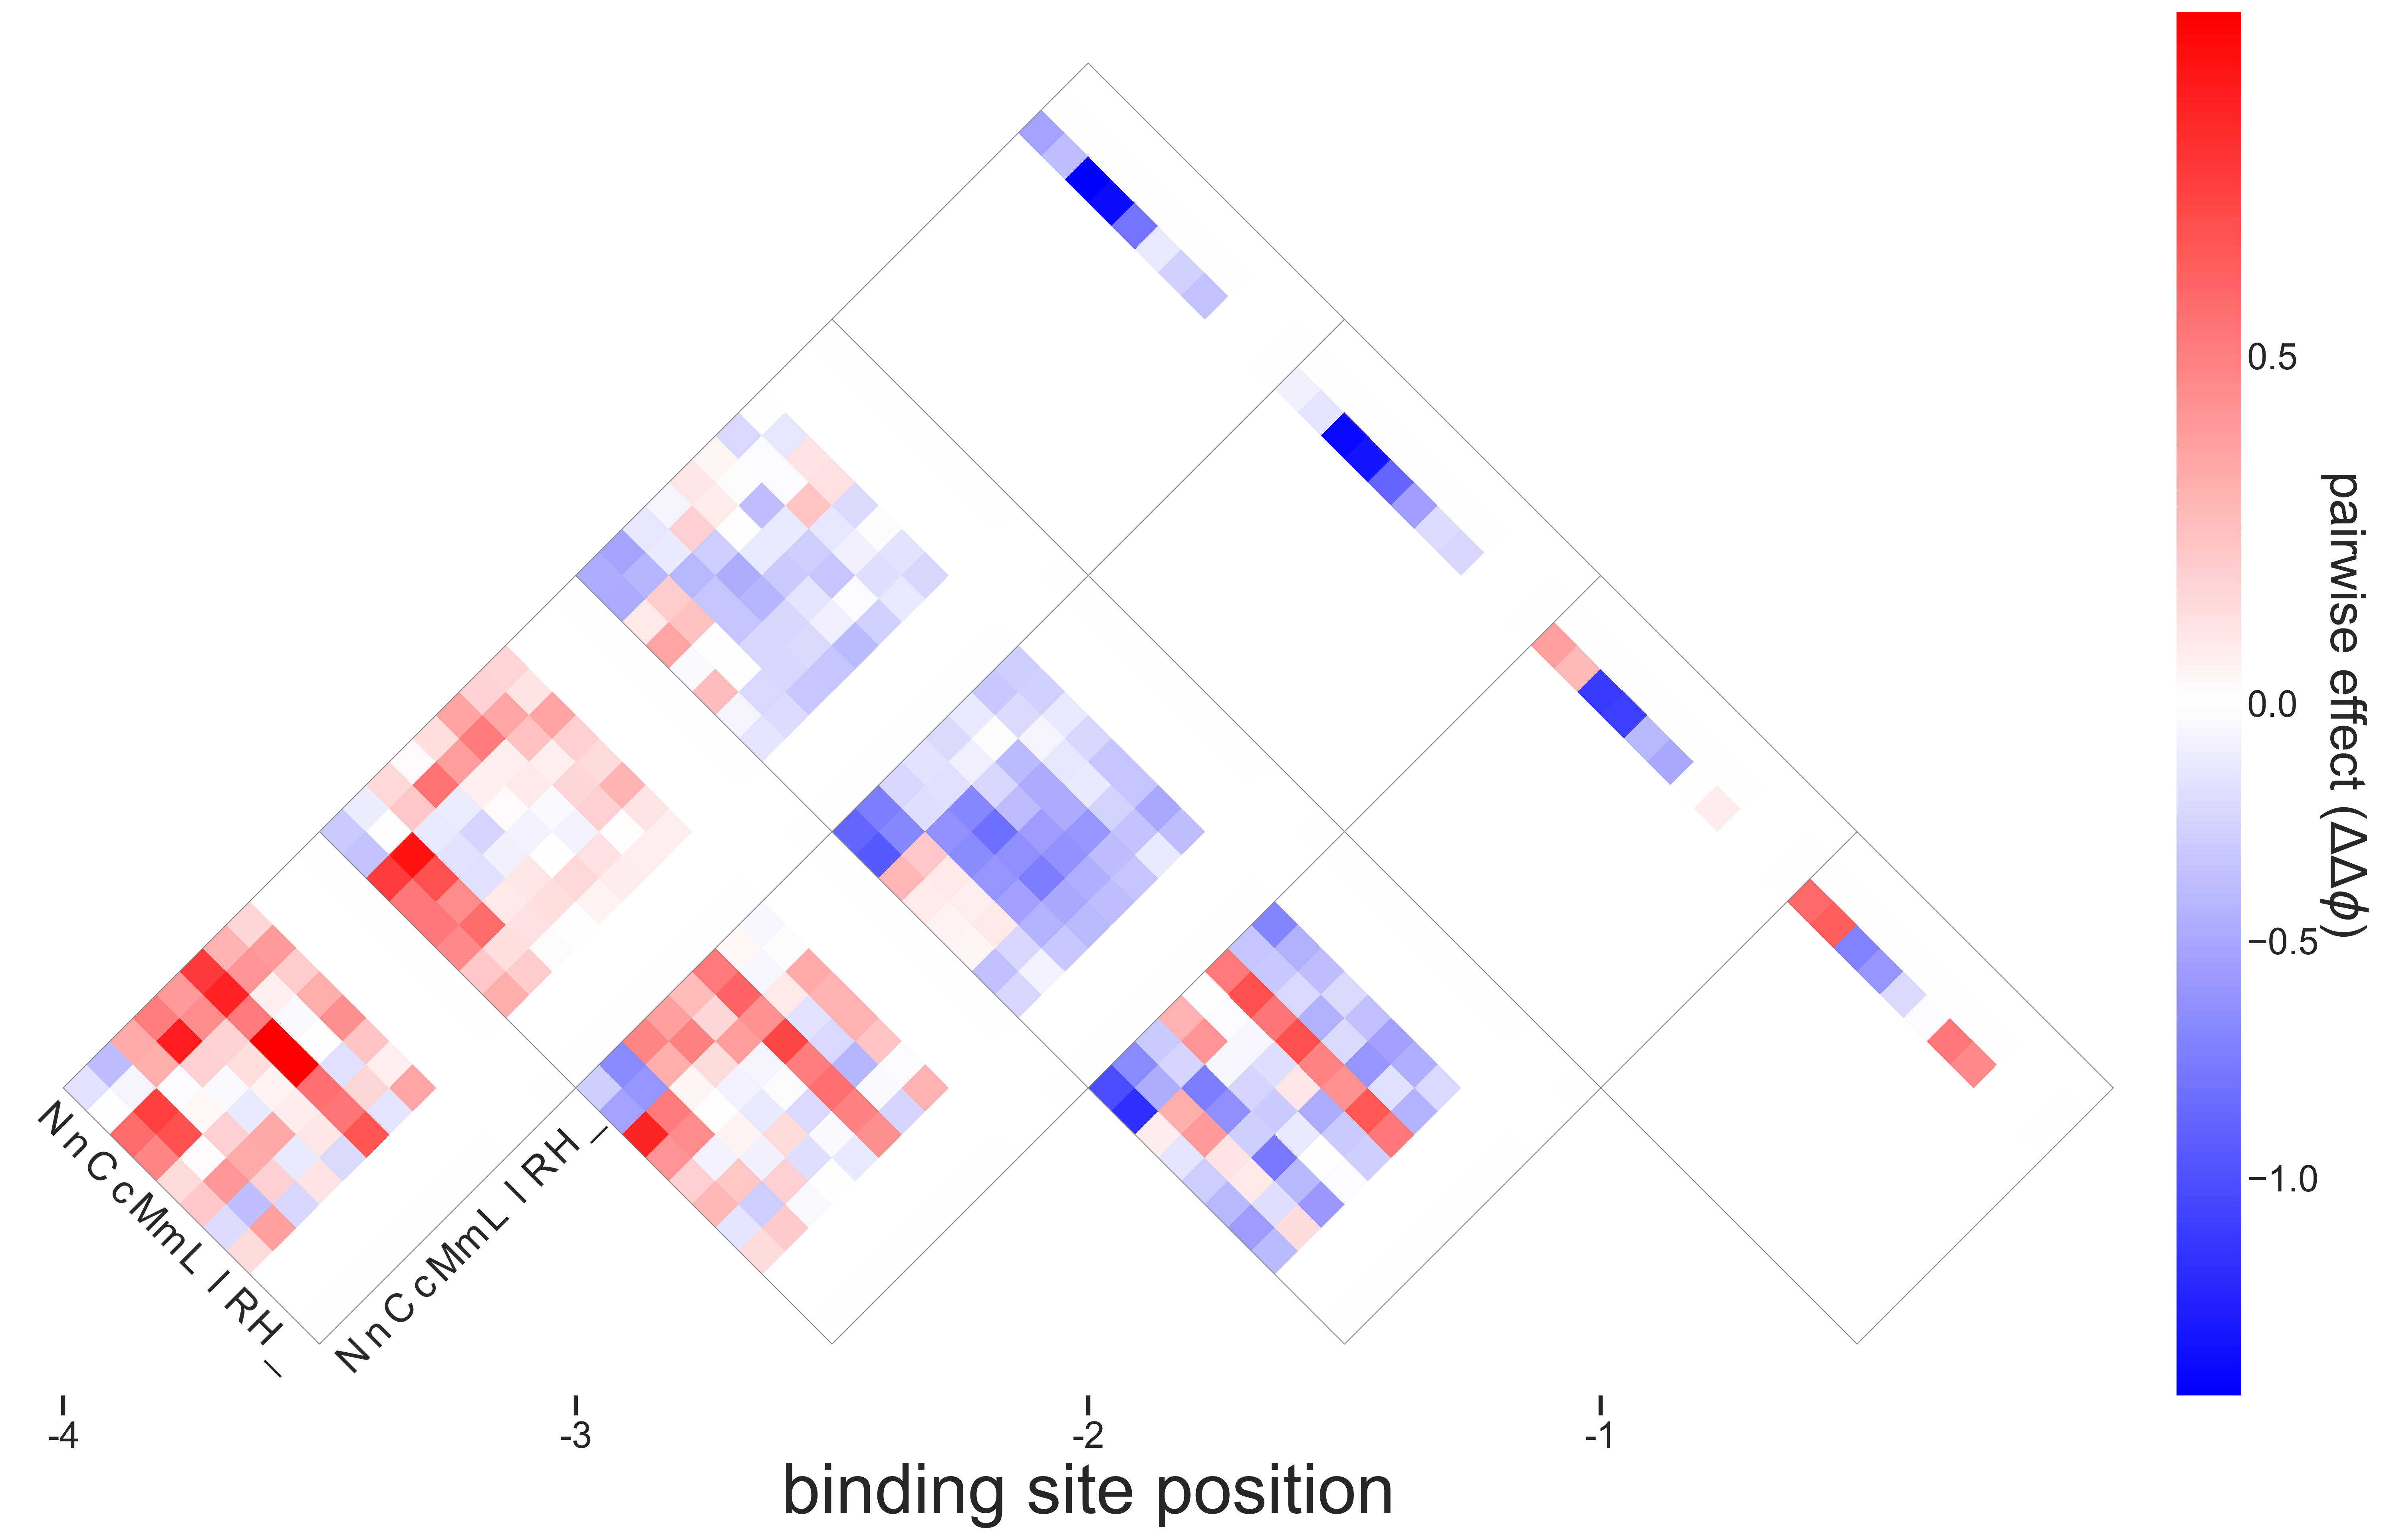

In [136]:
site_letters = ['N', 'n', 'C', 'c', 'M', 'm', 'L', 'l', 'R', 'H', '_']

# Get pairwise parameters from theta_dict
theta_lclc = theta_dict['theta_lclc']

sns.set_theme(style="ticks")
sns.set_context('poster')
fig, ax = plt.subplots(figsize=[30,15])

# Draw heatmap
ax, cb = mavenn.heatmap_pairwise(values=theta_lclc,
                                 alphabet=site_letters,
                                 ax=ax,
                                 gpmap_type='pairwise',
                                 cmap_size='3%', cmap = 'bwr')

# Style heatmap
ax.set_xticks([0,1,2,3])
ax.set_xticklabels([f'{x:+d}' for x in range(-4,0) if x!=0])
ax.set_xlabel('binding site position', labelpad=5, fontsize = 42)

# Style colorbar
cb.set_label('pairwise effect ($\Delta \Delta \phi$)',
             labelpad=15, fontsize = 30,ha='center', va='center', rotation=-90)
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=30, color='white')

fig.savefig('figS2d.wtheatmap.tif', dpi=300, format='tif', bbox_inches = 'tight')

# Figure 2D

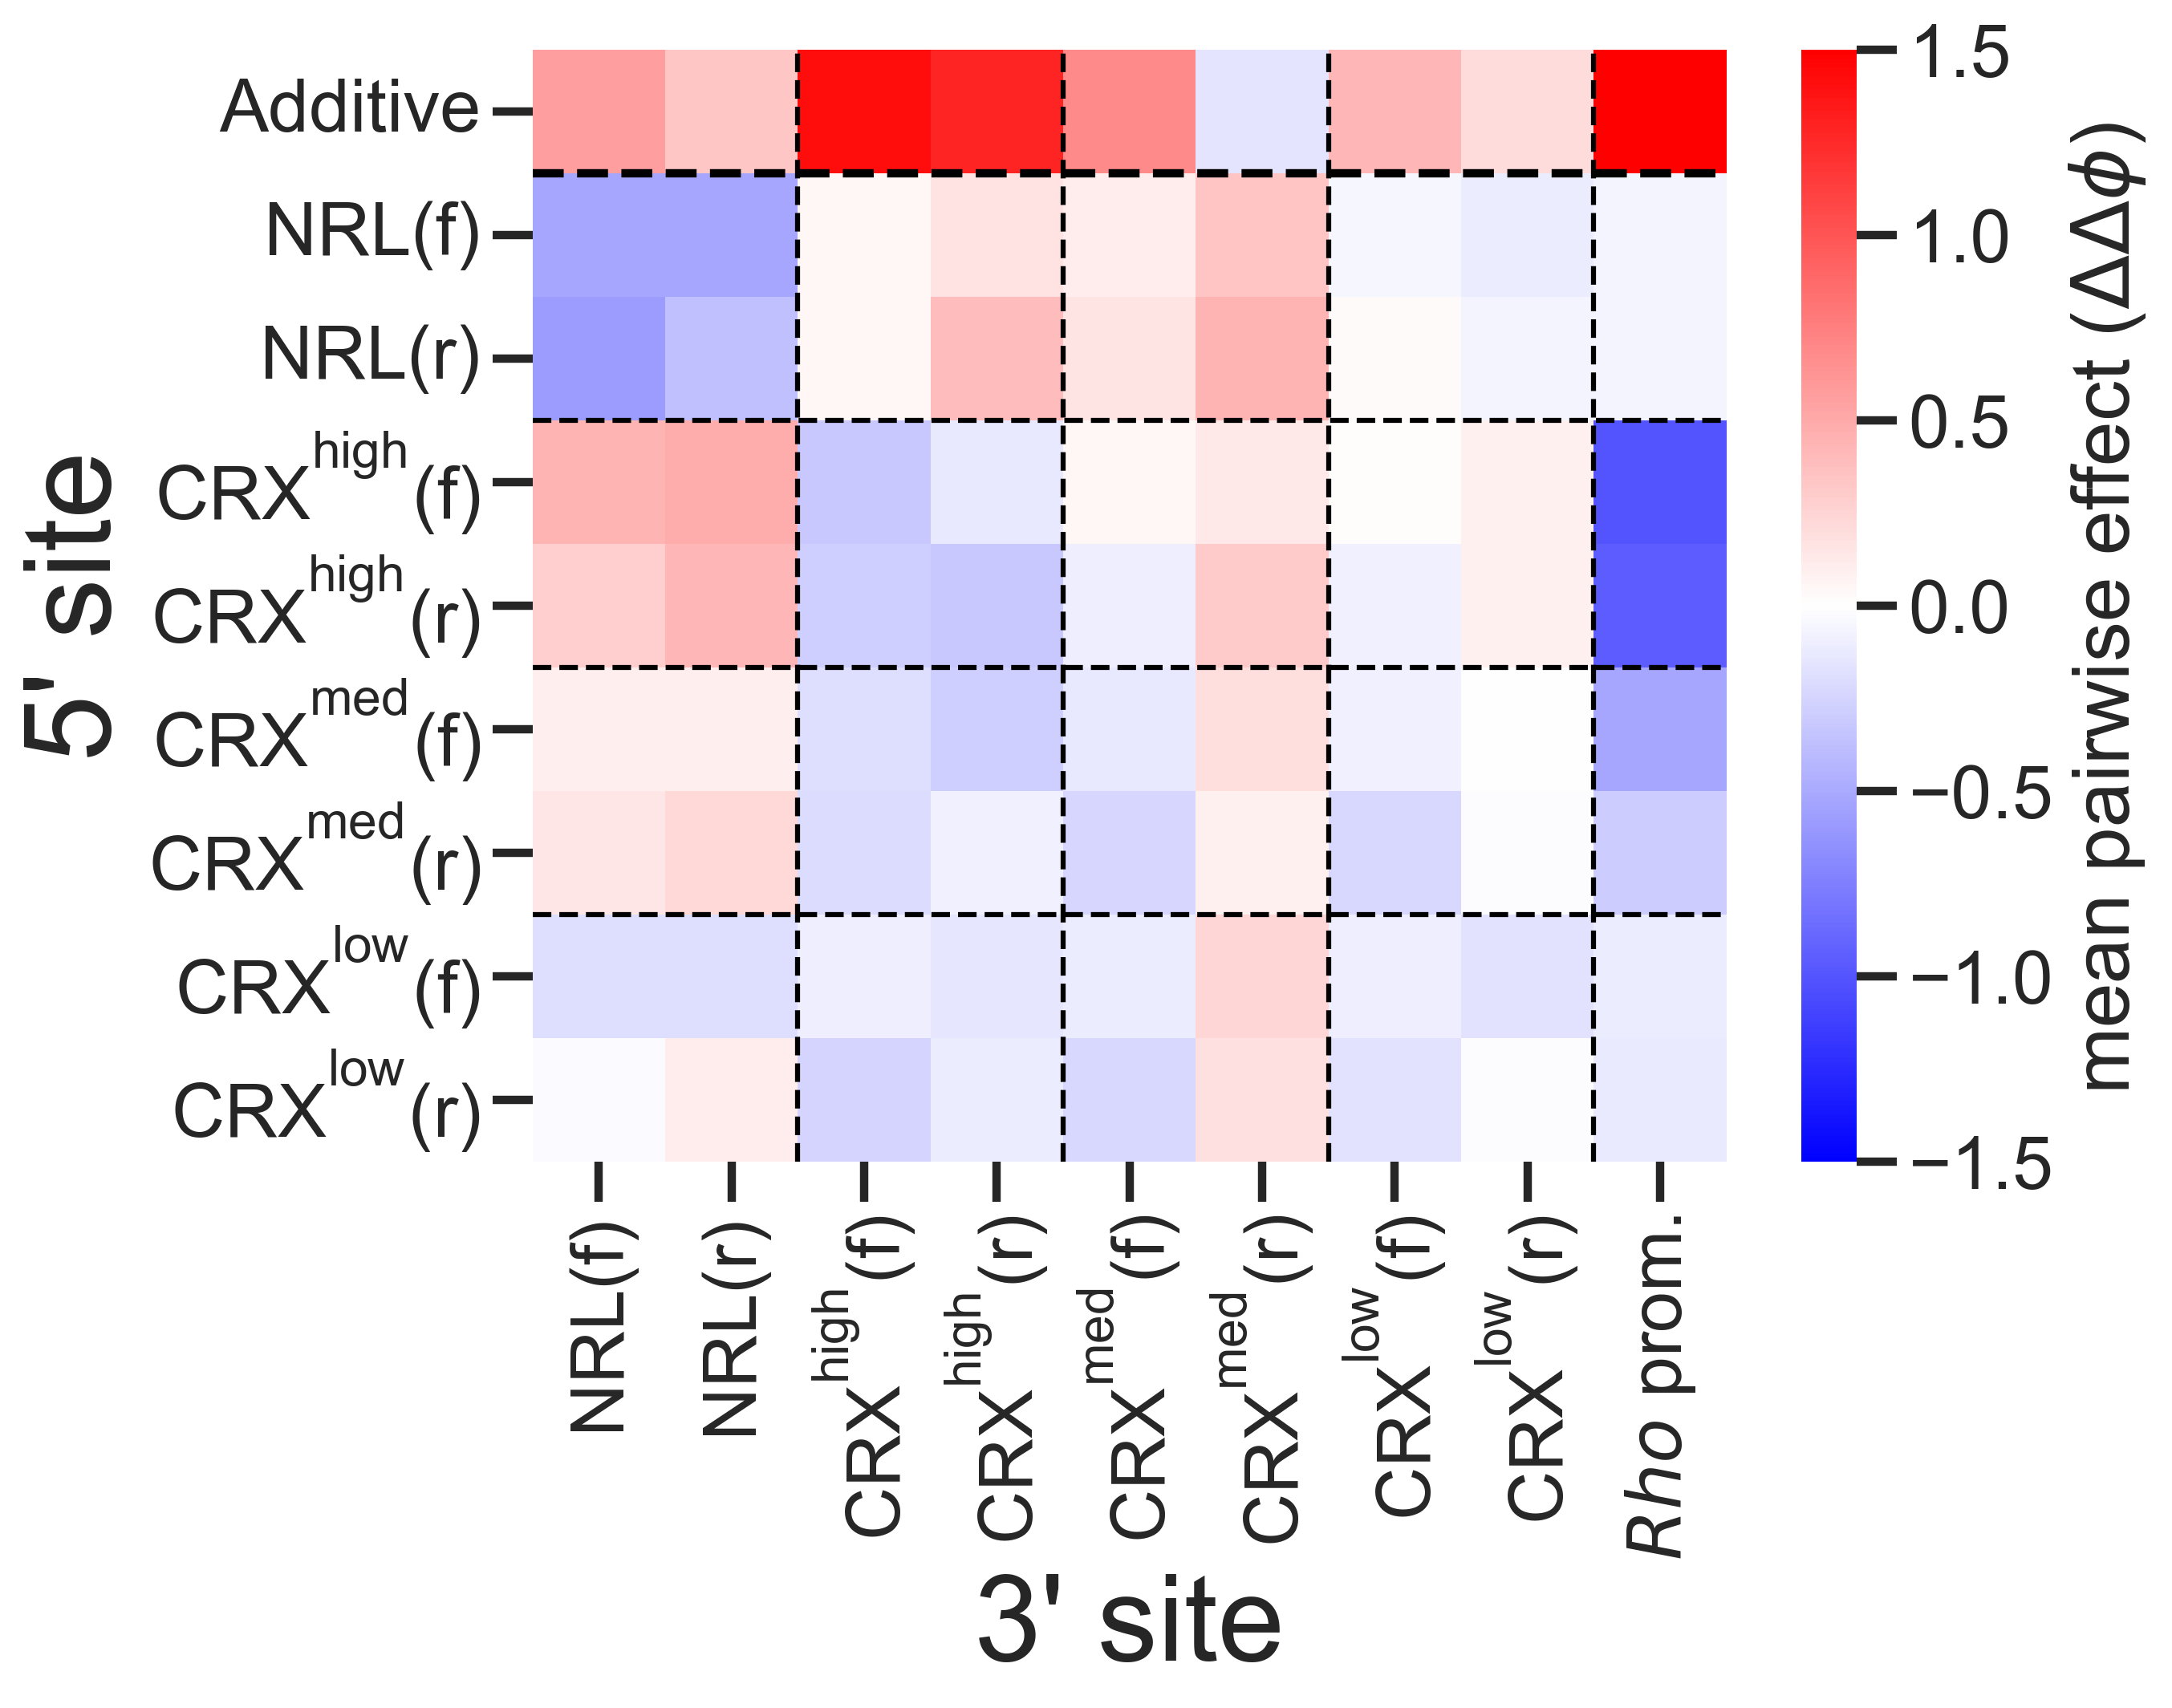

In [137]:
# Make heatmap of averaged additive and pairwise contributions

# Get logo dataframe
logo_df = theta_dict['logomaker_df']


TF_TF_interactions = np.zeros((8, 8))
for i, site1 in enumerate(theta_dict['theta_lclc']):
    if i < 3:
        for j, TF1 in enumerate(site1):
            if j < 8:
                for k, site2 in enumerate(TF1[(i + 1):(len(TF1) - 1)]):
                    #print(k, site2[0:8])
                    TF_TF_interactions[j] = TF_TF_interactions[j] + site2[0:8]
        #print(i, TF1[(i + 1):(len(TF1[0]) - 1)])
        #print(i, TF1[(i + 1):(len(site[0]) - 1)])
        
TF_TF_interactions = TF_TF_interactions/6
TF_TF_interactions


TF_promoter_interactions = np.zeros(8)
for i, site1 in enumerate(theta_dict['theta_lclc']):
    if i < 3:
        for j, TF1 in enumerate(site1[0:8]):
            TF_promoter_interactions[j] = TF_promoter_interactions[j] + np.asarray(TF1[4][8])
        
TF_promoter_interactions = TF_promoter_interactions/4
TF_promoter_interactions


TF_effects = np.asarray([[]])
for i, interaction in enumerate(TF_promoter_interactions):
    if i == 0:
        TF_effects = np.asarray([np.concatenate([TF_TF_interactions[i], np.asarray([interaction])])])
    else:
        TF_effects = np.append(TF_effects, np.asarray([np.concatenate([TF_TF_interactions[i], np.asarray([interaction])])]), axis = 0)
TF_effects


TF_additive = (logo_df.iloc[0][0:8] + logo_df.iloc[1][0:8] + logo_df.iloc[2][0:8] + logo_df.iloc[3][0:8])/4
TF_additive = np.append(TF_additive, logo_df['P'][4])


TF_effects = [np.asarray(TF_additive[0:9])] + list(TF_effects)


#sns.set_theme(style="ticks")
#sns.set_context('poster')

fig, ax = plt.subplots(figsize=[8,6])
sns.heatmap(np.asarray(TF_effects), cmap = 'bwr', center = 0, 
            xticklabels = ["NRL(f)", "NRL(r)", "$\mathregular{CRX^{high}(f)}$", "$\mathregular{CRX^{high}(r)}$", 
                           "$\mathregular{CRX^{med}(f)}$", "$\mathregular{CRX^{med}(r)}$", 
                           "$\mathregular{CRX^{low}(f)}$", "$\mathregular{CRX^{low}(r)}$", "$\it{Rho}$ prom."], 
            yticklabels = ["Additive", "NRL(f)", "NRL(r)", "$\mathregular{CRX^{high}(f)}$", "$\mathregular{CRX^{high}(r)}$", 
                           "$\mathregular{CRX^{med}(f)}$", "$\mathregular{CRX^{med}(r)}$", 
                           "$\mathregular{CRX^{low}(f)}$", "$\mathregular{CRX^{low}(r)}$"], 
            vmin = -1.5, vmax = 1.5, 
           cbar_kws = {'label':"mean pairwise effect ($\Delta \Delta \phi$) "})

# sns.heatmap(np.asarray(TF_effects), cmap = 'bwr', center = 0, vmin = -1.5, vmax = 1.5, xticklabels = [], yticklabels = [])
plt.xlabel("3' site", fontsize = 36, font = "Arial")
plt.ylabel("5' site", fontsize = 36, font = "Arial")

plt.axhline(1, color = 'black', linestyle = "--", lw = 2.5)
plt.axhline(3, color = 'black', linestyle = "--", lw = 1.5)
plt.axhline(5, color = 'black', linestyle = "--", lw = 1.5)
plt.axhline(7, color = 'black', linestyle = "--", lw = 1.5)
plt.axvline(2, color = 'black', linestyle = "--", lw = 1.5)
plt.axvline(4, color = 'black', linestyle = "--", lw = 1.5)
plt.axvline(6, color = 'black', linestyle = "--", lw = 1.5)
plt.axvline(8, color = 'black', linestyle = "--", lw = 1.5)
plt.show()

fig.savefig('fig2d.avgHeatmap.tif', dpi=300, format='tif', bbox_inches = 'tight')

# CRX NRL Wild Type Model Parameter Uncertainties

In [99]:
# load bootstrapped additive interactions
cn_add_df = pd.read_csv('bootstrapped_models/CRX_NRL_bootstrap_additive.txt', sep = '\t', header = 0)

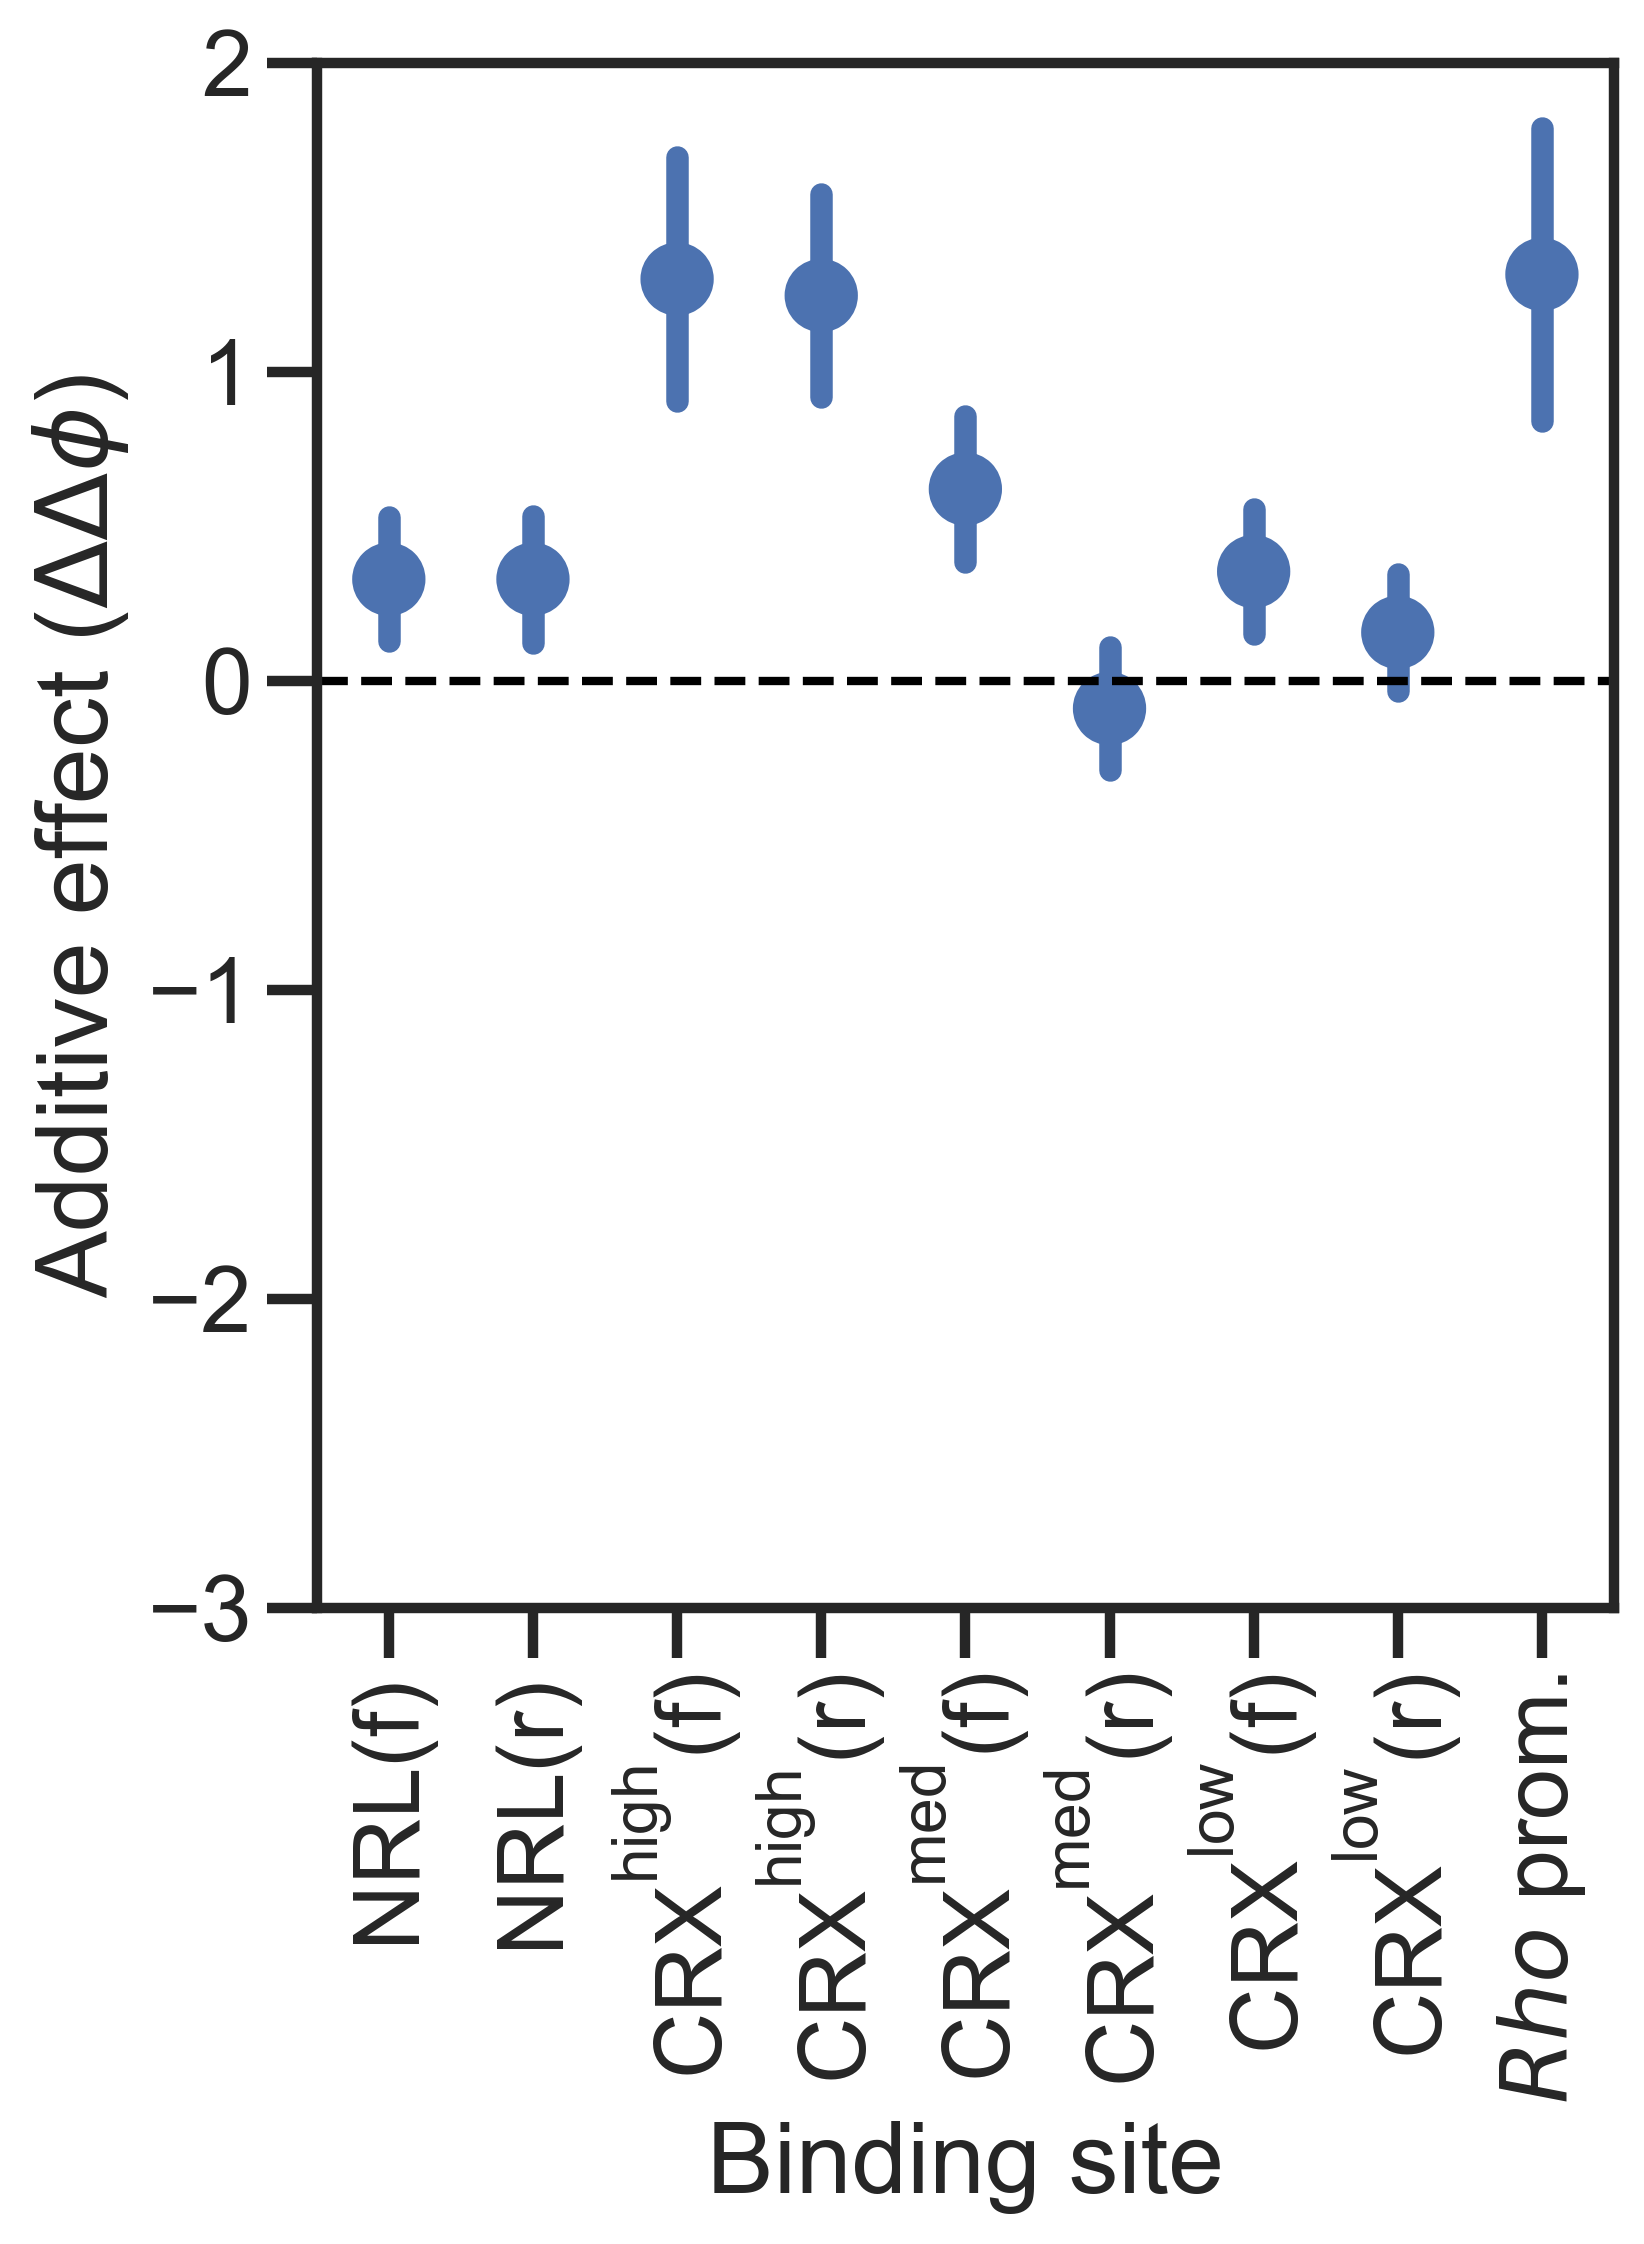

In [102]:
# Plot additive parameter uncertainties
fig, ax = plt.subplots(figsize=[6, 8])
sns.set_theme(style = "ticks")
sns.set_context('poster')

sns.pointplot(ax=ax,data=cn_add_df, join = False, errorbar="sd")
# ax.set(xlabel = 'Binding site', ylabel = 'mean pairwise effect ($\Delta \Delta \phi$)' )
plt.xlabel("Binding site", fontsize = 24, font = "Arial")
plt.ylabel("Additive effect ($\Delta \Delta \phi$)", fontsize = 24, font = "Arial")
ax.set_ylim([-3.0, 2.0])
xtick_loc = ax.get_xticks()
ax.set_xticks(ticks=xtick_loc,labels =["NRL(f)", "NRL(r)", "$\mathregular{CRX^{high}(f)}$", 
                        "$\mathregular{CRX^{high}(r)}$", 
                        "$\mathregular{CRX^{med}(f)}$", "$\mathregular{CRX^{med}(r)}$", 
                        "$\mathregular{CRX^{low}(f)}$", "$\mathregular{CRX^{low}(r)}$", "$\it{Rho}$ prom."],
                         rotation = 90 )
plt.axhline(0, color = 'black', linestyle = "--", lw = 2)
plt.tight_layout()
fig.savefig('figs2F.tif', dpi=300, format='tif', bbox_inches = 'tight')

In [103]:
# Load and sort pairwise interactions by rank

filename = 'bootstrapped_models/CRX_NRL_boostrap_interactions.csv'

df = pd.read_csv(filename, sep = ',', header = None)
mean_df = df.mean(axis=0)
df = pd.concat([df, mean_df.to_frame().T], ignore_index=True)
df_T = df.T
df_T.sort_values(by=20, inplace = True, ignore_index=True)
df_sorted = df_T.T
df_sorted.drop([20], axis=0,inplace=True)

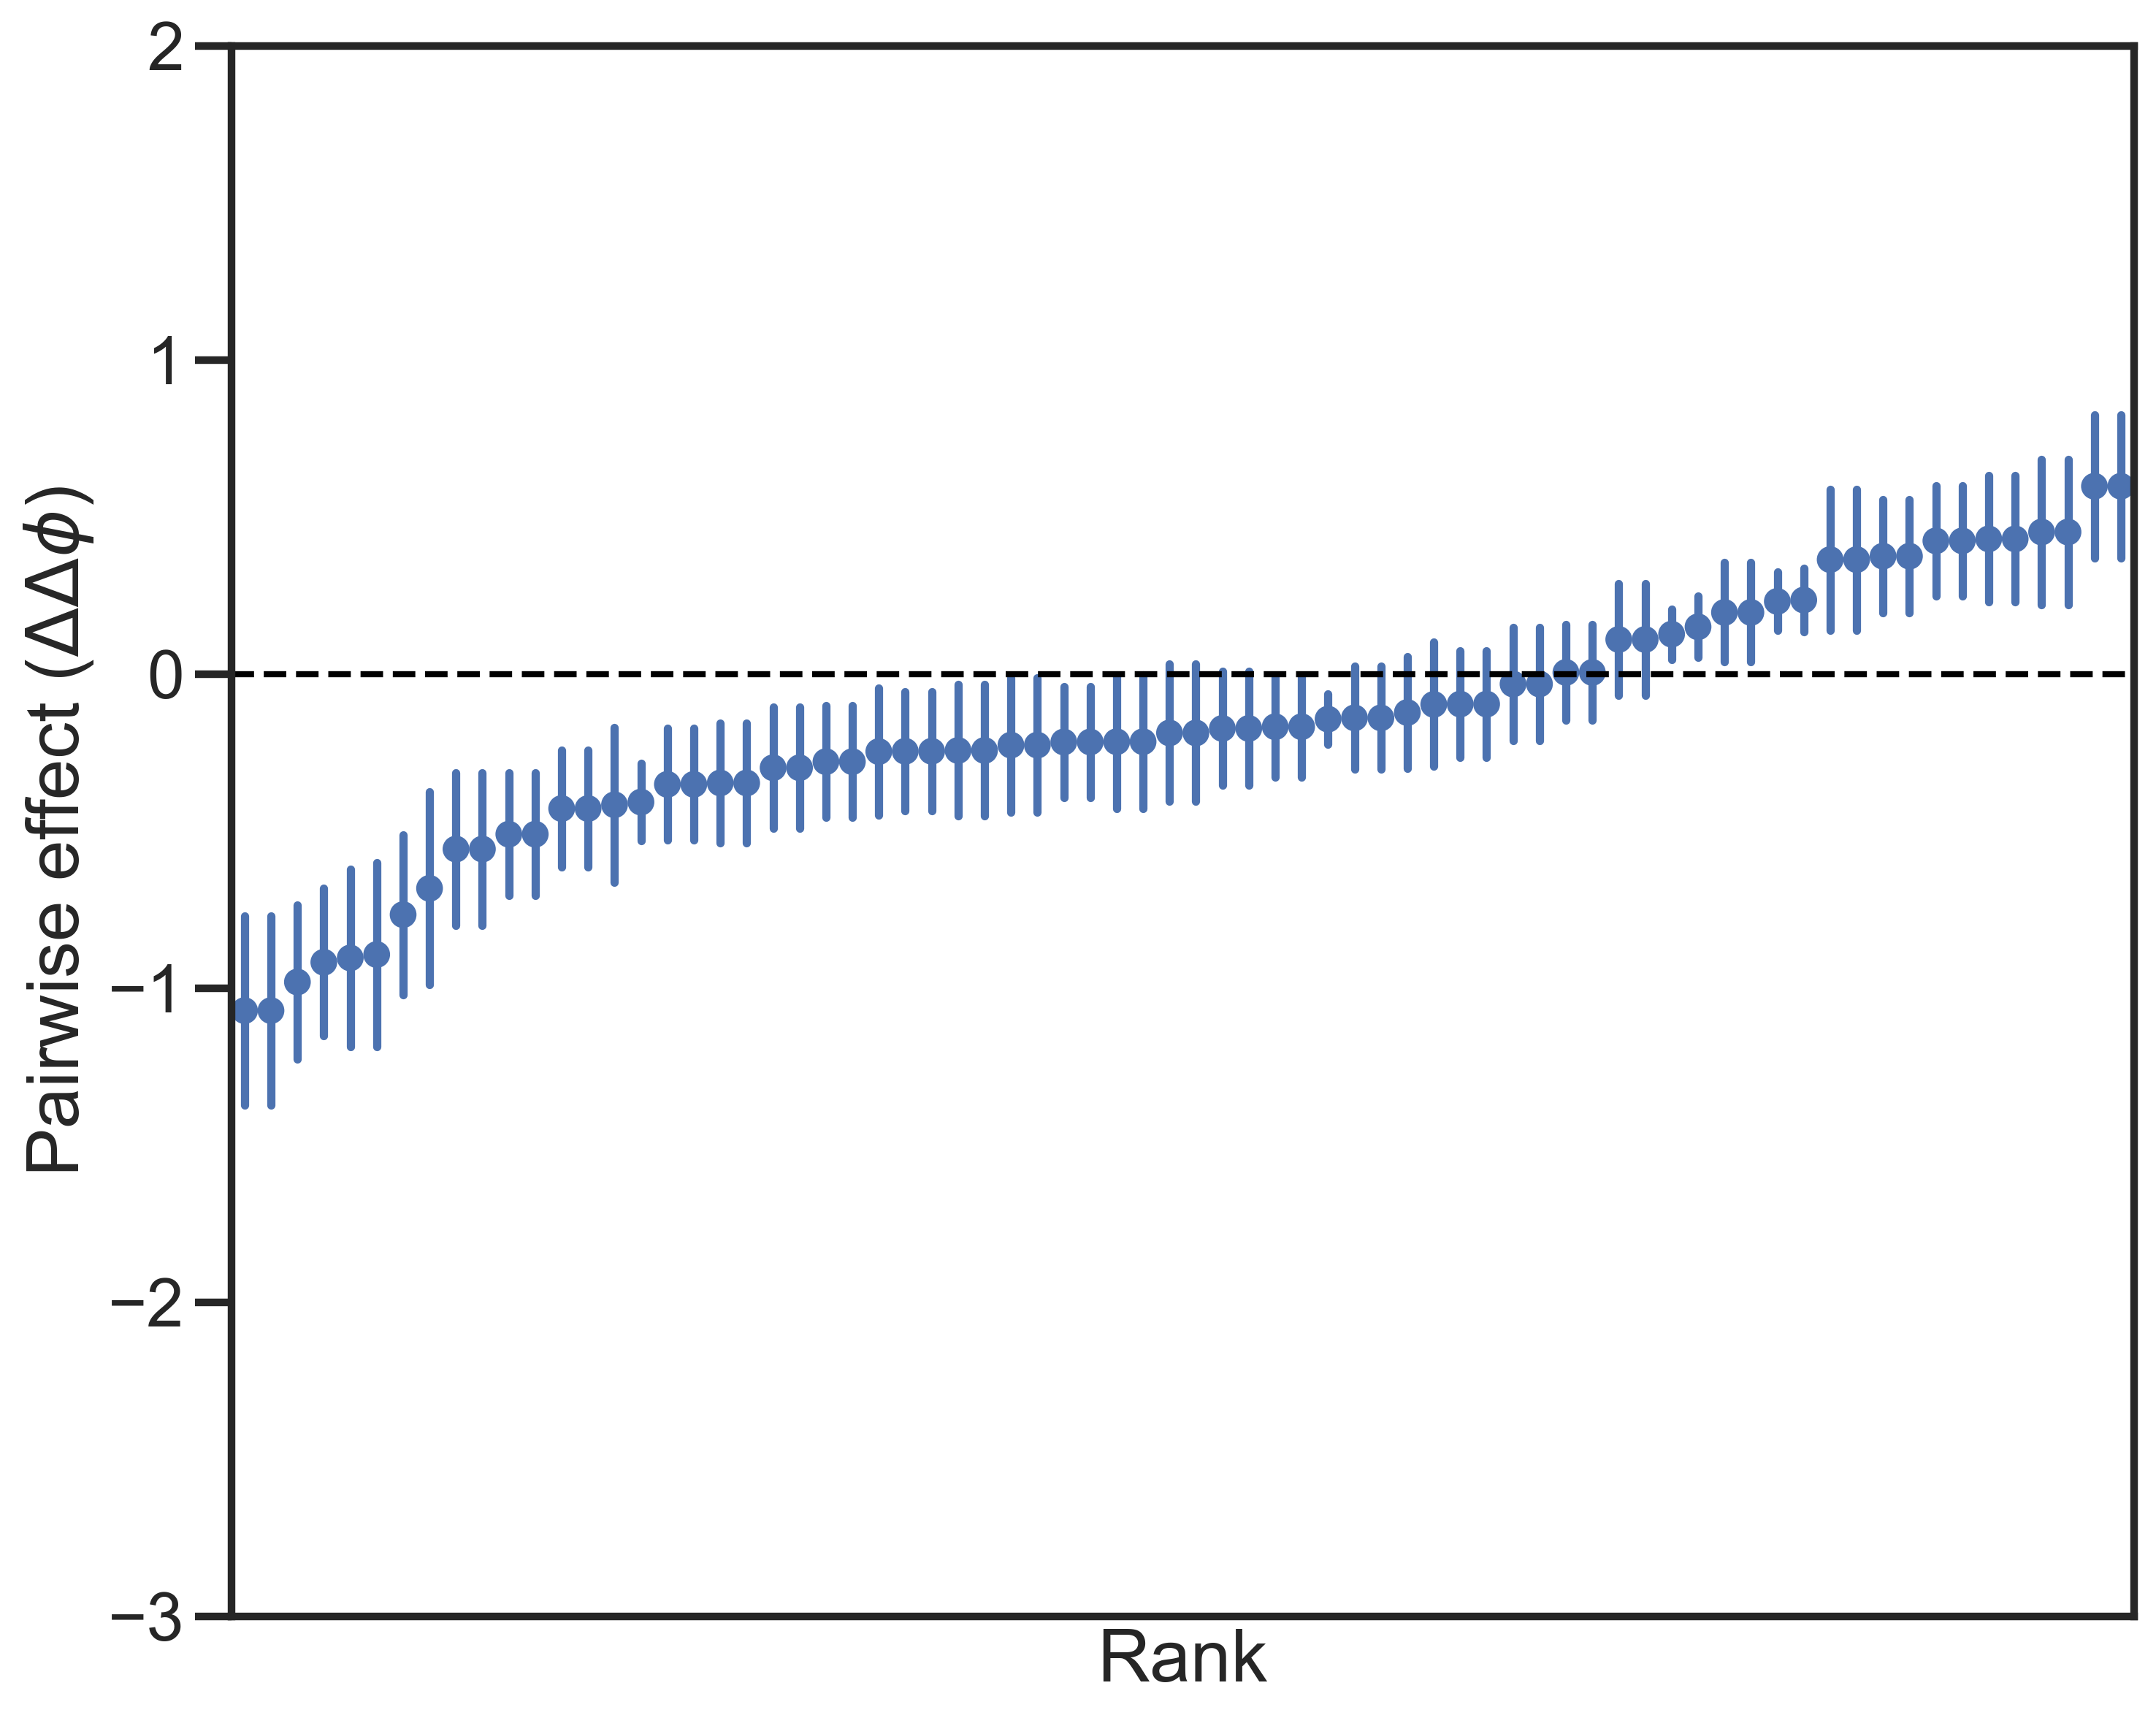

In [104]:
# Plot pairwise interaction uncertainties
fig, ax = plt.subplots(figsize=[10, 8])
# sns.set(rc={"figure.dpi":300, 'savefig.dpi':300}, font_scale = 1)
sns.set_theme(style = "ticks")
sns.set_context('notebook')

sns.pointplot(data=df_sorted, join = False, errorbar="sd")

# ax.set(xlabel = 'Rank', ylabel = 'mean pairwise effect ($\Delta \Delta \phi$)', )
plt.xlabel("Rank", fontsize = 24, font = "Arial")
plt.ylabel("Pairwise effect ($\Delta \Delta \phi$)", fontsize = 24, font = "Arial")
ax.tick_params(bottom=False, labelbottom=False)
ax.set_ylim([-3.0, 2.0])
plt.axhline(0, color = 'black', linestyle = "--", lw = 2)
plt.tight_layout()
fig.savefig('figs2G.tif', dpi=300, format='tif', bbox_inches = 'tight')

# Test robustness of CRX med reverse site fit
This site shows an unusual pattern compared to other CRX sites.

In [138]:
# Create list of model names of top fit models
model_ids = [0,10,16,17,19,21,22,24]
model_names = [f'all_promoters_pairwise_ge_{i}' for i in model_ids]

# Load models into a dictionary indexed by model name
cn_model_dict = {name:mavenn.load('saved_models/' + name) for name in model_names}

Model loaded from these files:
	saved_models/all_promoters_pairwise_ge_0.pickle
	saved_models/all_promoters_pairwise_ge_0.h5
Model loaded from these files:
	saved_models/all_promoters_pairwise_ge_10.pickle
	saved_models/all_promoters_pairwise_ge_10.h5
Model loaded from these files:
	saved_models/all_promoters_pairwise_ge_16.pickle
	saved_models/all_promoters_pairwise_ge_16.h5
Model loaded from these files:
	saved_models/all_promoters_pairwise_ge_17.pickle
	saved_models/all_promoters_pairwise_ge_17.h5
Model loaded from these files:
	saved_models/all_promoters_pairwise_ge_19.pickle
	saved_models/all_promoters_pairwise_ge_19.h5
Model loaded from these files:
	saved_models/all_promoters_pairwise_ge_21.pickle
	saved_models/all_promoters_pairwise_ge_21.h5
Model loaded from these files:
	saved_models/all_promoters_pairwise_ge_22.pickle
	saved_models/all_promoters_pairwise_ge_22.h5
Model loaded from these files:
	saved_models/all_promoters_pairwise_ge_24.pickle
	saved_models/all_promoters_pair

In [139]:
# List additive F values
f_effects = []
for key in cn_model_dict.keys():
    model = cn_model_dict[key]
    theta_dict = model.get_theta(gauge="user", x_wt = "OOOOH")
    logo_df = theta_dict['logomaker_df']
    TF_additive = (logo_df.iloc[0][4] + logo_df.iloc[1][4] + logo_df.iloc[2][4] + logo_df.iloc[3][4])/4
    f_effects.append(TF_additive)

# List additive R values
r_effects = []
for key in cn_model_dict.keys():
    model = cn_model_dict[key]
    theta_dict = model.get_theta(gauge="user", x_wt = "OOOOH")
    logo_df = theta_dict['logomaker_df']
    TF_additive = (logo_df.iloc[0][5] + logo_df.iloc[1][5] + logo_df.iloc[2][5] + logo_df.iloc[3][5])/4
    r_effects.append(TF_additive)
print(r_effects, f_effects)

[-0.11763312900438905, 0.006730286404490471, -0.021183398536781556, -0.17808444921904817, -0.23055589669093024, -0.30887835077010095, -0.13071947009302676, -0.1570683950849343] [0.5894999814918265, 0.6250778264366093, 0.6455621775239706, 0.46260016271844506, 0.5281993622378971, 0.4615108813159168, 0.6288942088722256, 0.6844388294266537]


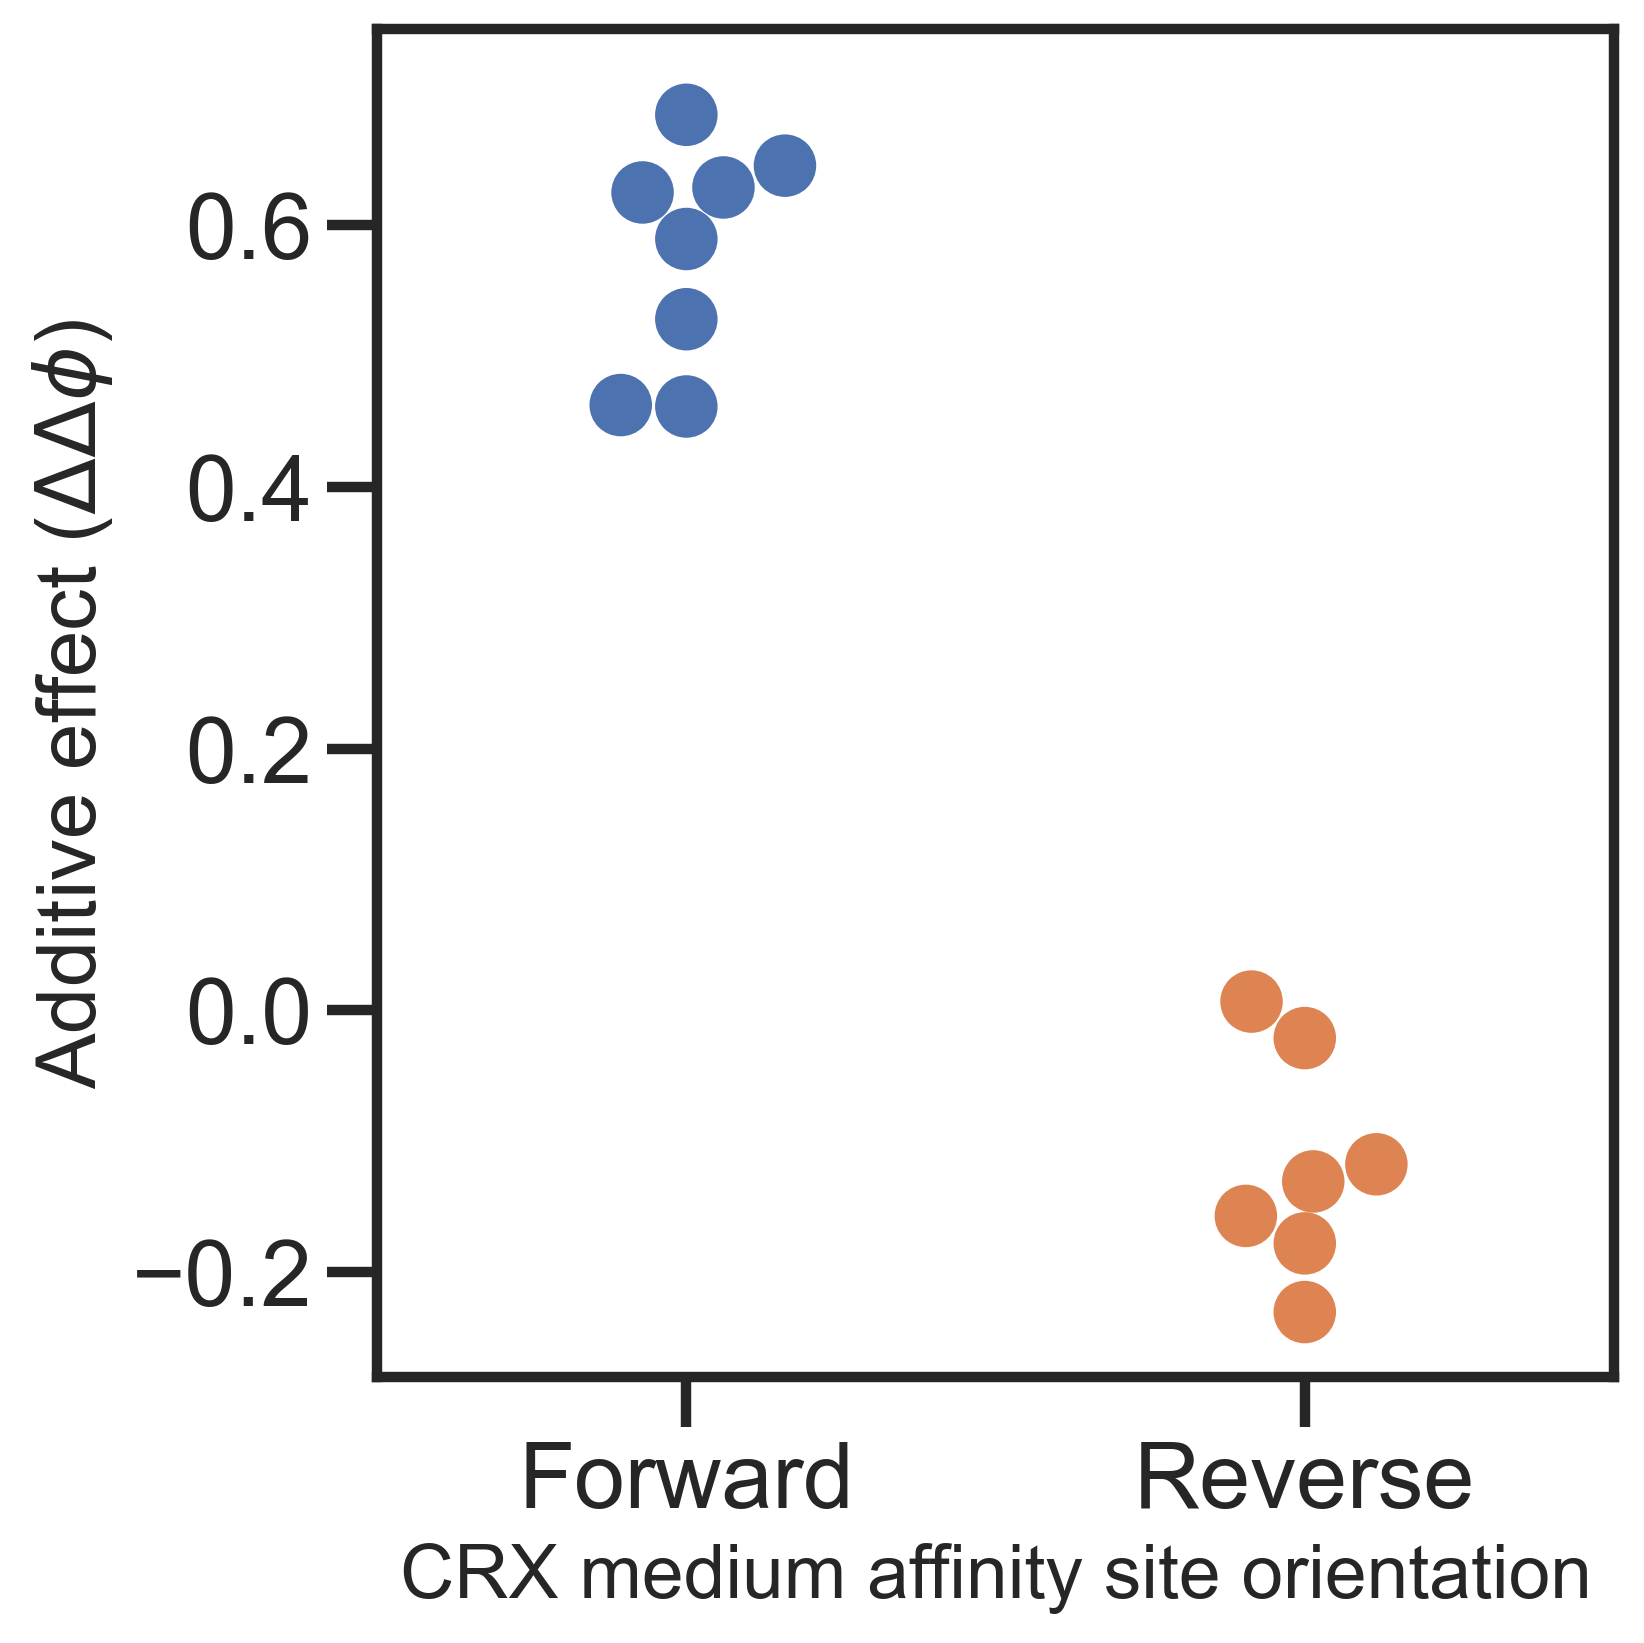

In [145]:
data = {'Forward':f_effects, 'Reverse':r_effects}
df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=[6, 6])
sns.set_theme(style = "ticks")
sns.set_context('poster')

sns.swarmplot(data=df, s=15)
# fix marker size

plt.xlabel("CRX medium affinity site orientation", fontsize = 18, font = "Arial")
plt.ylabel("Additive effect ($\Delta \Delta \phi$)", fontsize = 20, font = "Arial")
ax.set_ylim([-0.28, 0.75])
xtick_loc = ax.get_xticks()
plt.tight_layout()
fig.savefig('figS2J.tif', dpi=300, format='tif', bbox_inches = 'tight')

# Load CRX + NRL in Crx -/- retina model files

As derscribed in the paper, MAVE-NN models were trained on `Data S3` from White, et al. (2016), cited above. Modeling results from multuiple random starts are in `saved_models/` with filenames beginning with `crxnull_`.

In [58]:
# Iterate over types of G-P maps
gpmap_types = ['additive','neighbor','pairwise','blackbox']

# Create list of model names
model_names = [f'crxnull_{gpmap_type}_ge_{i}' for gpmap_type in gpmap_types for i in range(20)]

# Load models into a dictionary indexed by model name
null_model_dict = {name:mavenn.load('saved_models/' + name) for name in model_names}

Model loaded from these files:
	saved_models/crxnull_additive_ge_0.pickle
	saved_models/crxnull_additive_ge_0.h5
Model loaded from these files:
	saved_models/crxnull_additive_ge_1.pickle
	saved_models/crxnull_additive_ge_1.h5
Model loaded from these files:
	saved_models/crxnull_additive_ge_2.pickle
	saved_models/crxnull_additive_ge_2.h5
Model loaded from these files:
	saved_models/crxnull_additive_ge_3.pickle
	saved_models/crxnull_additive_ge_3.h5
Model loaded from these files:
	saved_models/crxnull_additive_ge_4.pickle
	saved_models/crxnull_additive_ge_4.h5
Model loaded from these files:
	saved_models/crxnull_additive_ge_5.pickle
	saved_models/crxnull_additive_ge_5.h5
Model loaded from these files:
	saved_models/crxnull_additive_ge_6.pickle
	saved_models/crxnull_additive_ge_6.h5
Model loaded from these files:
	saved_models/crxnull_additive_ge_7.pickle
	saved_models/crxnull_additive_ge_7.h5
Model loaded from these files:
	saved_models/crxnull_additive_ge_8.pickle
	saved_models/crxnull_

Model loaded from these files:
	saved_models/crxnull_blackbox_ge_14.pickle
	saved_models/crxnull_blackbox_ge_14.h5
Model loaded from these files:
	saved_models/crxnull_blackbox_ge_15.pickle
	saved_models/crxnull_blackbox_ge_15.h5
Model loaded from these files:
	saved_models/crxnull_blackbox_ge_16.pickle
	saved_models/crxnull_blackbox_ge_16.h5
Model loaded from these files:
	saved_models/crxnull_blackbox_ge_17.pickle
	saved_models/crxnull_blackbox_ge_17.h5
Model loaded from these files:
	saved_models/crxnull_blackbox_ge_18.pickle
	saved_models/crxnull_blackbox_ge_18.h5
Model loaded from these files:
	saved_models/crxnull_blackbox_ge_19.pickle
	saved_models/crxnull_blackbox_ge_19.h5


In [60]:
# Compute predictive information

Data_file = open("saved_models/crxnull_trainval.pkl", "rb")
null_trainval_df = pickle.load(Data_file)
Data_file.close()

Data_file = open("saved_models/crxnull_test.pkl", "rb")
null_test_df = pickle.load(Data_file)
Data_file.close()

# Fill out dataframe containing values to plot
# This dataframe will then be used by seaborn's barplot() function
null_info_df = pd.DataFrame(columns=['name', 'gpmap', 'metric', 'I', 'dI'], index = ["additive", "neighbor", "pairwise", "blackbox"])
for j in range(5):
    for i in range(20):
        for gpmap_type in gpmap_types:

            # Get model
            name = f'crxnull_{gpmap_type}_ge_{i}'
            model = null_model_dict[name]

            # Compute variational information on test data
            #I_var, dI_var =  model.I_variational(x=test_df['Sequence'], y=test_df['Expression'])
            #row = {'name':name,
            #       'gpmap':gpmap_type,
            #       'metric':'I_var',
            #       'I':I_var,
            #       'dI':dI_var}
            #info_df = info_df.append(row, ignore_index=True)

            # Compute predictive information on test data
            I_pred, dI_pred = model.I_predictive(x=null_test_df['synthetic_promoter'], y=null_test_df['Rho_basal_crxnull'])
            row = {'name':name,
                   'gpmap':gpmap_type,
                   'metric':'I_pred',
                    'I':I_pred,
                   'dI':dI_pred}
            if pd.isna(null_info_df.loc[gpmap_type, "I"]) or I_pred > null_info_df.loc[gpmap_type, "I"]:
                null_info_df.loc[gpmap_type] = row

# Print dataframe
print('Contents of info_df:', null_info_df, sep='\n')

Contents of info_df:
                            name     gpmap  metric         I        dI
additive  crxnull_additive_ge_19  additive  I_pred  0.848014  0.026596
neighbor   crxnull_neighbor_ge_4  neighbor  I_pred  1.475042   0.03669
pairwise   crxnull_pairwise_ge_5  pairwise  I_pred    2.2359  0.044679
blackbox   crxnull_blackbox_ge_9  blackbox  I_pred  3.763784  0.045628


# Figure S2A

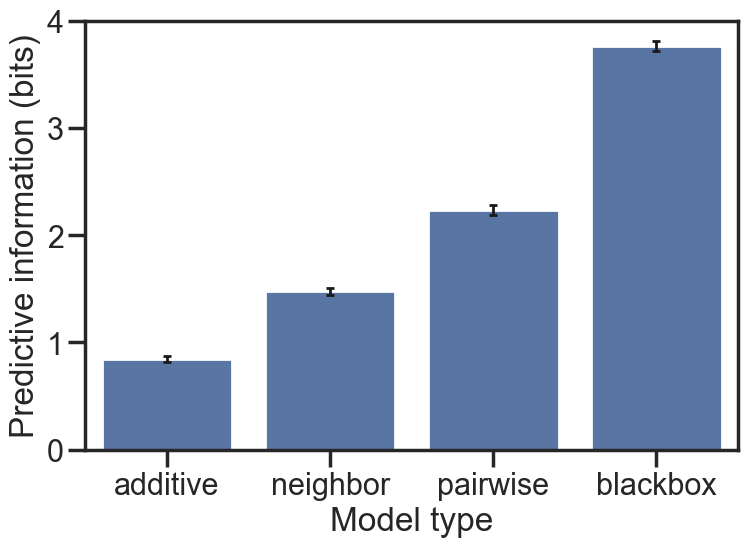

In [61]:
# Plot predictive information
# Create figure

fig, ax = plt.subplots(figsize=[8, 6])
sns.set_theme(style = "ticks")
sns.set_context('poster')

# Plot bars
sns.barplot(ax=ax,
            data=null_info_df,
            hue='metric',
            x='gpmap',
            y='I')

# Plot errorbars
x = np.array([[x] for x in range(4)]).ravel()
ax.errorbar(x=x,
            y=null_info_df['I'].values,
            yerr=null_info_df['dI'].values,
            color='k', capsize=3, linestyle='none',
            elinewidth=2, capthick=2, solid_capstyle='round')

ax.set(xlabel = 'Model type', ylabel = 'Predictive information (bits)' )
ax.set_xlim([-.5, 3.5])
ax.set_ylim([0, 4])
#plt.title("CRX null", fontsize = 24)
plt.legend([],[], frameon=False)

plt.tight_layout()
fig.savefig('figS2a.NullpredInfo.tif', dpi=300, format='tif', bbox_inches = 'tight')

# Figure S2B

In [ ]:
# Plot latent phenotype vs measured activity

sns.set_theme(style="ticks")
sns.set_context('poster')

# Create figure and axes for plotting
fig, ax = plt.subplots(1,1,figsize=[8,8])

# Loop over models
#for ax, name in zip(axs, ['all_promoters_pairwise_ge']):

name = 'crxnull_pairwise_ge_5'
# Get model
model = null_model_dict[name]

# Get test data y values
y_test = null_test_df['Rho_basal_crxnull']

# Compute phi on test data
phi_test = model.x_to_phi(null_test_df['synthetic_promoter'])

## Set phi lims and create a grid in phi space
phi_lim = [min(phi_test)-.5, max(phi_test)+.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Compute yhat for each phi gridpoint
yhat_grid = model.phi_to_yhat(phi_grid)

# Compute 95% CI for each yhat
q = [0.025, 0.975]
yqs_grid = model.yhat_to_yq(yhat_grid, q=q)

# Plote 95% confidence interval
ax.fill_between(phi_grid, yqs_grid[:, 0], yqs_grid[:, 1],
                alpha=0.2, color='C1', lw=0, label='95% CI')

# Plot GE nonlinearity
ax.plot(phi_grid, yhat_grid,
        linewidth=3, color='C1', label='Nonlinearity')

# Plot scatter of phi and y values.
ax.scatter(phi_test, y_test,
            color='C0', s=10, alpha=.5, label='Test data', zorder=+100)

# Plot basal
ax.scatter(model.x_to_phi('OOOO'), null_test_df['Rho_basal_crxnull'][0],
            color='black', s=100, alpha=1, label='$\it{Rho}$ prom.', zorder=+100)

# Style plot
ax.set_xlim(phi_lim)
ax.set_xlabel('Latent phenotype ($\phi$)')
ax.set_ylim([-4,1.5])
ax.set_ylabel('Measurement ($y$)')
#ax.set_title(f'CRX null test set', fontsize = 36)

ax.legend(loc='lower right', fontsize = 16, borderaxespad = 0.2, handletextpad=0.1)

fig.tight_layout()
fig.savefig('figS2b.Nullnonlinearity.tif', dpi=300, format='tif', bbox_inches = 'tight')

# Figure S2C

In [ ]:
# Plot predicted vs measured activity

sns.set_theme(style="ticks")
sns.set_context('poster')

# Create figure and axes for plotting
fig, ax = plt.subplots(1,1,figsize=[8,8])

# Loop over models
#for ax, name in zip(axs, ['all_promoters_pairwise_ge']):

name = 'crxnull_pairwise_ge_5'
# Get model
model = null_model_dict[name]

# Get test data y values
y_test = null_test_df['Rho_basal_crxnull']

# Compute phi on test data
phi_test = model.x_to_phi(null_test_df['synthetic_promoter'])
yhat_test = model.phi_to_yhat(phi_test)

## Set phi lims and create a grid in phi space
phi_lim = [min(phi_test)-.5, max(phi_test)+.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Compute yhat for each phi gridpoint
yhat_grid = model.phi_to_yhat(phi_grid)

# Compute 95% CI for each yhat
q = [0.025, 0.975]
yqs_grid = model.yhat_to_yq(yhat_grid, q=q)

# Plote 95% confidence interval
ax.fill_between(yhat_grid, yqs_grid[:, 0], yqs_grid[:, 1],
                alpha=0.1, color='C1', lw=0, label='95% CI')

# Plot x=y
ax.plot(yhat_grid, yhat_grid,
        linewidth=3, color='C1', label='X = Y')

# Plot scatter of yhat and y values.
ax.scatter(yhat_test, y_test,
            color='C0', s=10, alpha=0.5, label='test data', zorder=+100)

# Plot basal
ax.scatter(model.phi_to_yhat(model.x_to_phi('OOOO')), null_test_df['Rho_basal_crxnull'][0],
            color='black', s=100, alpha=1, label='$\it{Rho}$ prom.', zorder=+100)

# Style plot
ax.set_xlim([min(yhat_grid)-0.03, max(yhat_grid)])
ax.set_xlabel('Predicted activity ($y\u0302$)')
ax.set_ylim([-4,1.5])
ax.set_ylabel('Measurement ($y$)')
#ax.set_title(f'CRX null test set', fontsize = 36)
ax.text(0.02,0.98, "Pearson $\it{r}$ = " + str(scipy.stats.pearsonr(yhat_test, y_test)[0])[0:5], ha="left", va="top", transform=ax.transAxes, fontsize = 24)
ax.legend(loc='lower right', fontsize = 18, borderaxespad = 0.2, handletextpad=0.1)

fig.tight_layout()
fig.savefig('figS2c.NullobsVpred.tif', dpi=300, format='tif', bbox_inches = 'tight')

# Figure S2E

In [62]:
# Focus on best pairwise model
model = null_model_dict['crxnull_pairwise_ge_5']

# Retrieve G-P map parameter dict and view dict keys
theta_dict = model.get_theta(gauge="user", x_wt = "OOOO")
theta_dict.keys()

dict_keys(['L', 'C', 'alphabet', 'theta_0', 'theta_lc', 'theta_lclc', 'theta_mlp', 'logomaker_df'])

In [ ]:
# site_letters = ['N', 'n', 'C', 'c', 'R', 'r', 'X', 'x', 'O']
site_letters = ['N', 'n', 'C', 'c', 'M', 'm', 'L', 'l', '_']


# Get pairwise parameters from theta_dict
theta_lclc = theta_dict['theta_lclc']

sns.set_theme(style="ticks")
sns.set_context('poster')
# Create fig and ax objects
fig, ax = plt.subplots(figsize=[30,15])

# Draw heatmap
ax, cb = mavenn.heatmap_pairwise(values=theta_lclc,
                                 alphabet=site_letters,
                                 ax=ax,
                                 gpmap_type='pairwise',
                                 cmap_size='3%', cmap = 'bwr')

# Style heatmap
ax.set_xticks([0,1,2,3])
ax.set_xticklabels([f'{x:+d}' for x in range(-4,0) if x!=0])
ax.set_xlabel('binding site position', labelpad=5, fontsize = 42)

# Style colorbar
cb.set_label('pairwise effect ($\Delta \Delta \phi$)',
             labelpad=15, ha='center', va='center', rotation=-90)
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')

fig.savefig('figS2e.nullHeatmap.tif', dpi=300, format='tif', bbox_inches = 'tight')

# Figure 2E

In [ ]:
# Compute average interaction terms

TF_TF_interactions = np.zeros((8, 8))
for i, site1 in enumerate(theta_dict['theta_lclc']):
    if i < 3:
        for j, TF1 in enumerate(site1):
            if j < 8:
                for k, site2 in enumerate(TF1[(i + 1):(len(TF1) - 1)]):
                    #print(k, site2[0:8])
                    TF_TF_interactions[j] = TF_TF_interactions[j] + site2[0:8]
        #print(i, TF1[(i + 1):(len(TF1[0]) - 1)])
        #print(i, TF1[(i + 1):(len(site[0]) - 1)])
        
TF_TF_interactions

In [ ]:
# Get logo dataframe
logo_df = theta_dict['logomaker_df']

# Set NaN parameters to zero
logo_df.fillna(0, inplace=True)

# Get additive contributions

TF_additive = (logo_df.iloc[0] + logo_df.iloc[1] + logo_df.iloc[2] + logo_df.iloc[3])/4
plt.bar(np.linspace(0, 7, 8), TF_additive[0:8], tick_label = ["N", "n", "C", "c", "R", "r", "X", "x"])
plt.xlabel("TF")
plt.ylabel("Additive contribution")
plt.show()

In [ ]:
# Plot heatmap of contributions averaged across sites

TF_effects = [np.asarray(TF_additive[0:8])] + list(TF_TF_interactions/6)

#sns.heatmap(TF_effects, cmap = 'bwr', center = 0, xticklabels = ["N", "n", "C", "c", "R", "r", "X", "x"], yticklabels = ["Additive", "N", "n", "C", "c", "R", "r", "X", "x"], vmin = -1, vmax = 1.5)
#plt.xlabel("Downstream site", fontsize = 12, font = "Arial")
#plt.ylabel("Upstream site", fontsize = 12, font = "Arial")
#plt.axhline(1, color = "black", linestyle = "--")
#plt.axhline(3, color = "black", linestyle = "--")
#plt.axhline(5, color = "black", linestyle = "--")
#plt.axhline(7, color = "black", linestyle = "--")
#plt.axvline(2, color = "black", linestyle = "--")
#plt.axvline(4, color = "black", linestyle = "--")
#plt.axvline(6, color = "black", linestyle = "--")
#plt.show()


fig, ax = plt.subplots(figsize=[8,6])
sns.heatmap(np.asarray(TF_effects), cmap = 'bwr', center = 0, 
            xticklabels = ["NRL(f)", "NRL(r)", "$\mathregular{CRX^{high}(f)}$", "$\mathregular{CRX^{high}(r)}$", 
                           "$\mathregular{CRX^{med}(f)}$", "$\mathregular{CRX^{med}(r)}$", 
                           "$\mathregular{CRX^{low}(f)}$", "$\mathregular{CRX^{low}(r)}$"], 
            yticklabels = ["Additive", "NRL(f)", "NRL(r)", "$\mathregular{CRX^{high}(f)}$", "$\mathregular{CRX^{high}(r)}$", 
                           "$\mathregular{CRX^{med}(f)}$", "$\mathregular{CRX^{med}(r)}$", 
                           "$\mathregular{CRX^{low}(f)}$", "$\mathregular{CRX^{low}(r)}$"], 
            vmin = -1.5, vmax = 1.5)

# sns.heatmap(np.asarray(TF_effects), cmap = 'bwr', center = 0, vmin = -1.5, vmax = 1.5, xticklabels = [], yticklabels = [])
plt.xlabel("3' site", fontsize = 36, font = "Arial")
plt.ylabel("5' site", fontsize = 36, font = "Arial")
plt.axhline(1, color = 'black', linestyle = "--", lw = 2.5)
plt.axhline(3, color = 'black', linestyle = "--", lw = 1.5)
plt.axhline(5, color = 'black', linestyle = "--", lw = 1.5)
plt.axhline(7, color = 'black', linestyle = "--", lw = 1.5)
plt.axvline(2, color = 'black', linestyle = "--", lw = 1.5)
plt.axvline(4, color = 'black', linestyle = "--", lw = 1.5)
plt.axvline(6, color = 'black', linestyle = "--", lw = 1.5)


plt.show()

fig.savefig('fig2e.nullavgHeatmap.tif', dpi=300, format='tif', bbox_inches = 'tight')

# Bootstrap parameter uncertainties

In [106]:
# load bootstrapped additive interactions
null_add_df = pd.read_csv('bootstrapped_models/CRX_null_bootstrap_additive.txt', sep = '\t', header = 0)

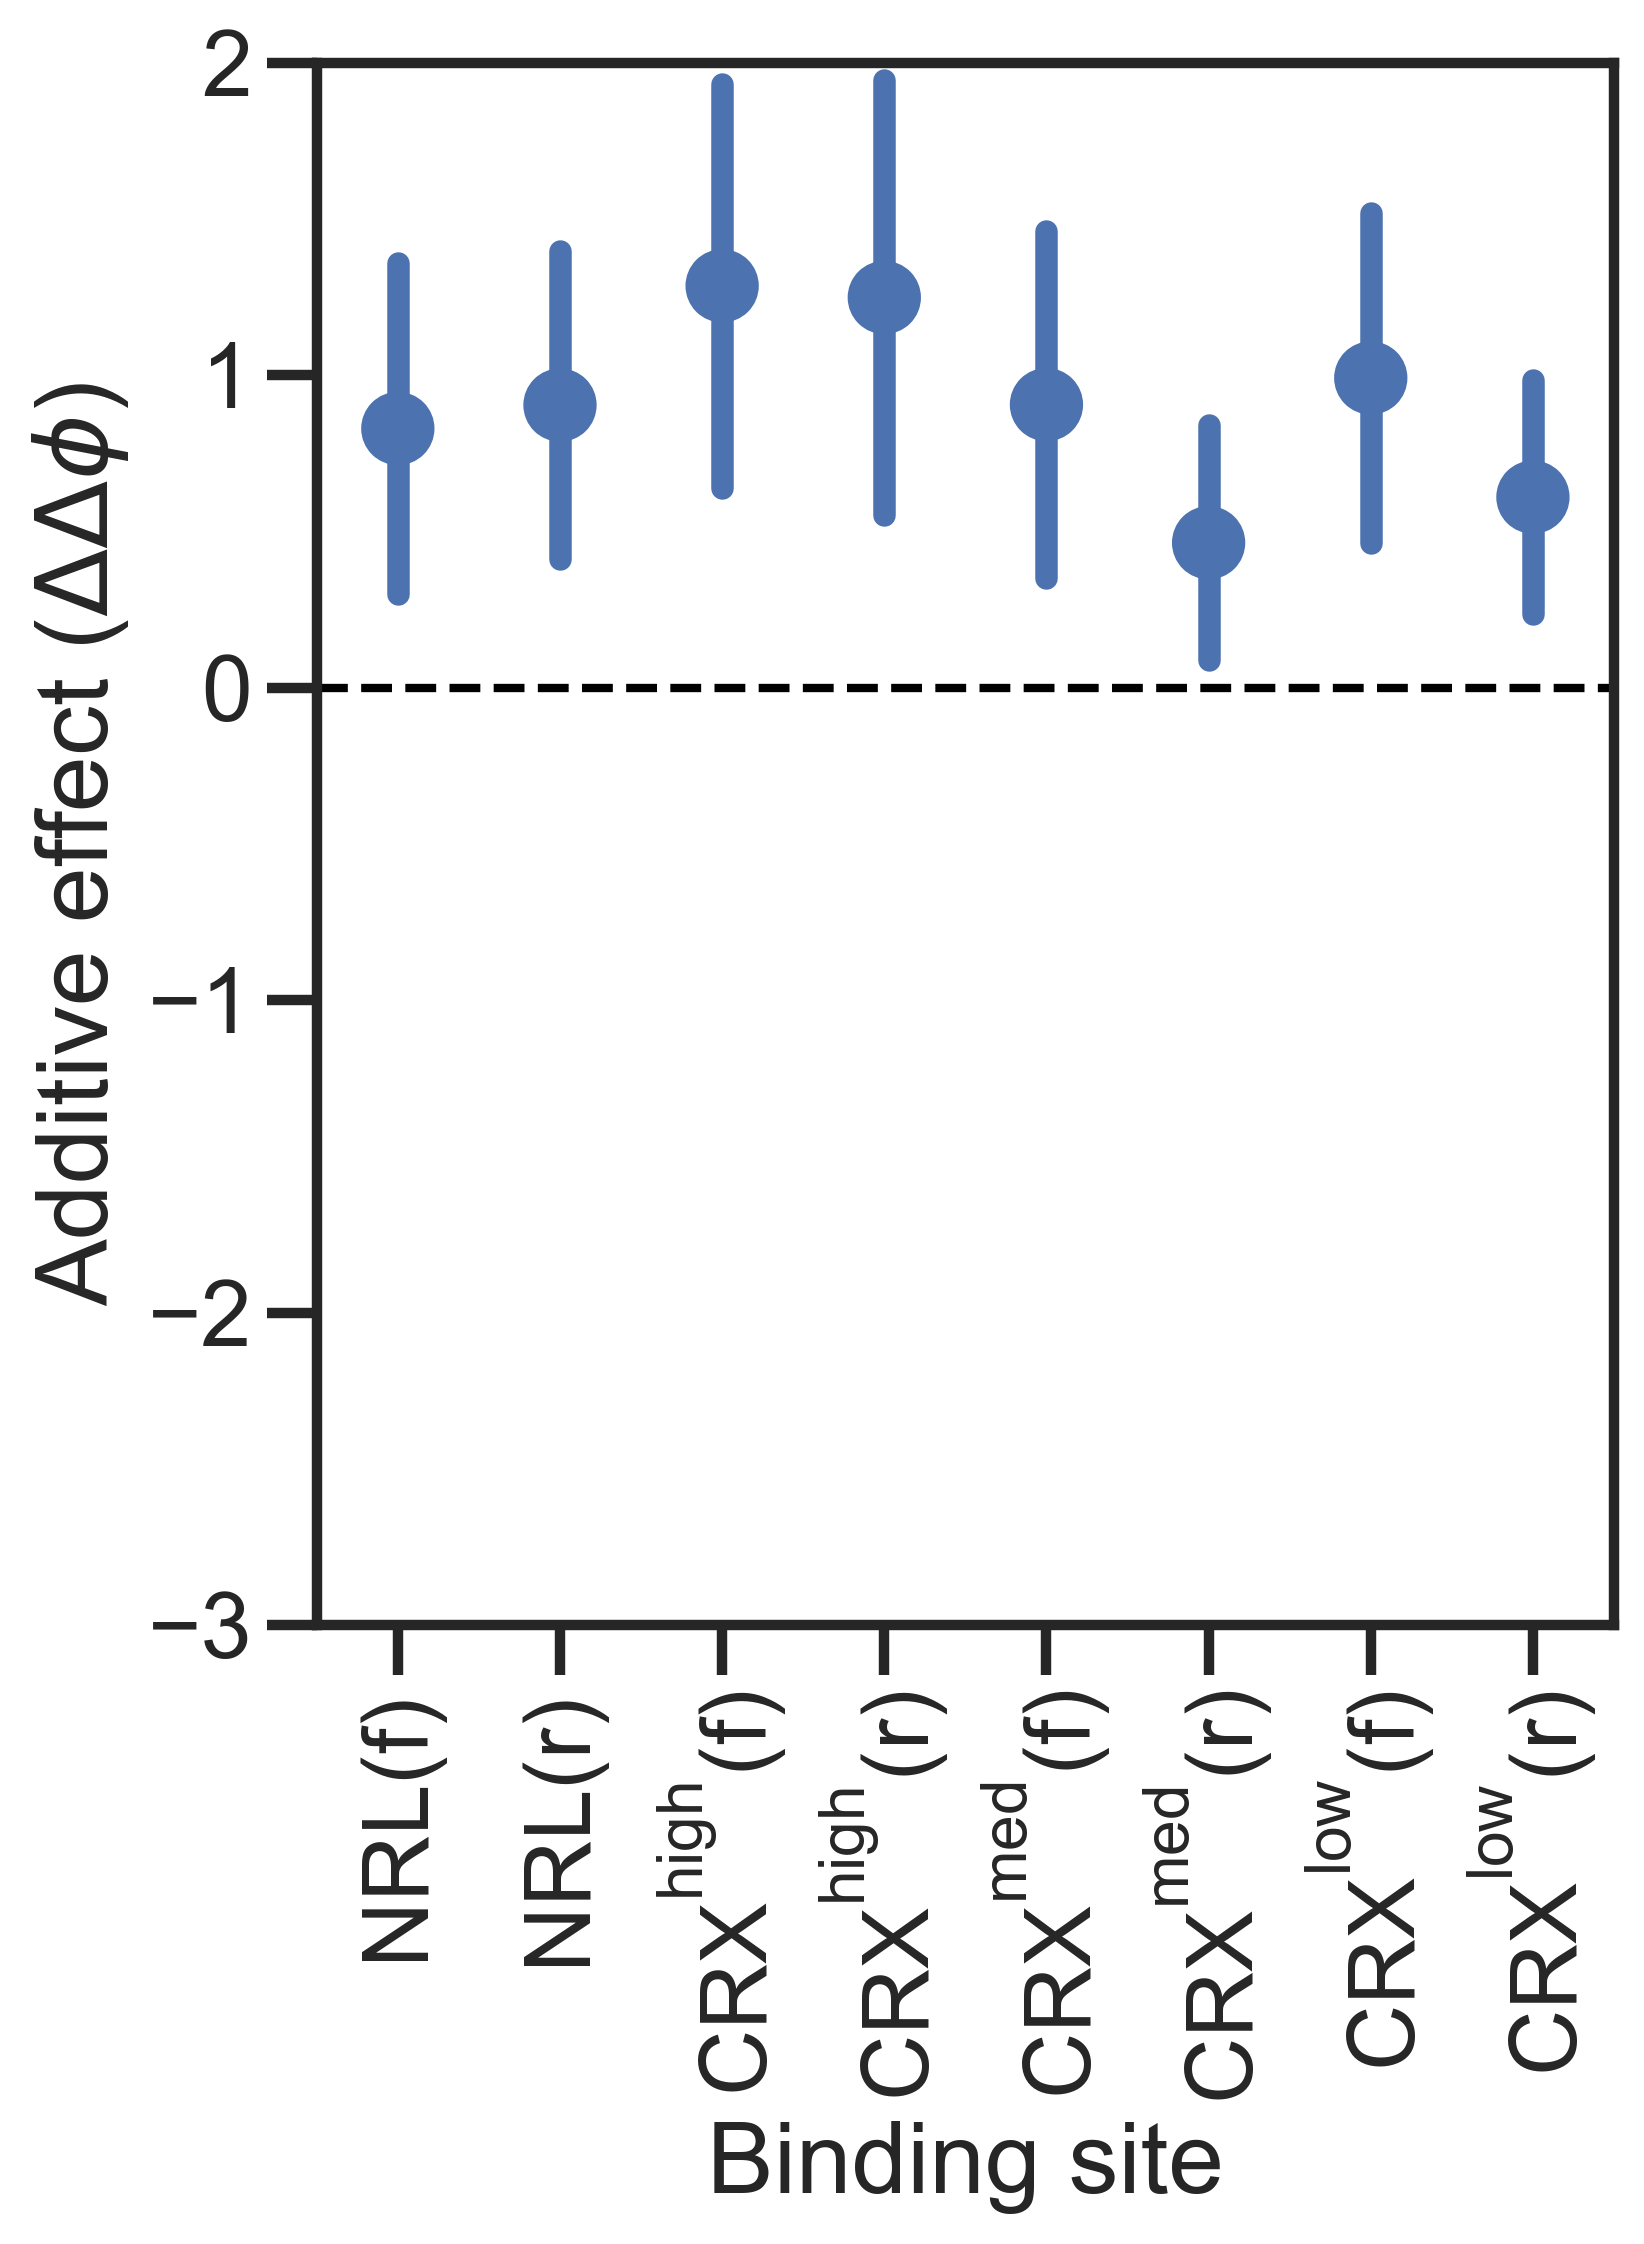

In [107]:
# Plot additive parameter uncertainties
fig, ax = plt.subplots(figsize=[6, 8])
sns.set_theme(style = "ticks")
sns.set_context('poster')

sns.pointplot(ax=ax,data=null_add_df, join = False, errorbar="sd")
# ax.set(xlabel = 'Binding site', ylabel = 'mean pairwise effect ($\Delta \Delta \phi$)' )
plt.xlabel("Binding site", fontsize = 24, font = "Arial")
plt.ylabel("Additive effect ($\Delta \Delta \phi$)", fontsize = 24, font = "Arial")
ax.set_ylim([-3.0, 2.0])
xtick_loc = ax.get_xticks()
ax.set_xticks(ticks=xtick_loc,labels =["NRL(f)", "NRL(r)", "$\mathregular{CRX^{high}(f)}$", 
                        "$\mathregular{CRX^{high}(r)}$", 
                        "$\mathregular{CRX^{med}(f)}$", "$\mathregular{CRX^{med}(r)}$", 
                        "$\mathregular{CRX^{low}(f)}$", "$\mathregular{CRX^{low}(r)}$"],
                         rotation = 90 )
plt.axhline(0, color = 'black', linestyle = "--", lw = 2)
plt.tight_layout()
fig.savefig('figs2H.tif', dpi=300, format='tif', bbox_inches = 'tight')

In [108]:
# Load and sort pairwise interactions by rank

filename = 'bootstrapped_models/CRX_null_boostrap_interactions.csv'

df = pd.read_csv(filename, sep = ',', header = None)
mean_df = df.mean(axis=0)
df = pd.concat([df, mean_df.to_frame().T], ignore_index=True)
df_T = df.T
df_T.sort_values(by=20, inplace = True, ignore_index=True)
df_sorted = df_T.T
df_sorted.drop([20], axis=0,inplace=True)

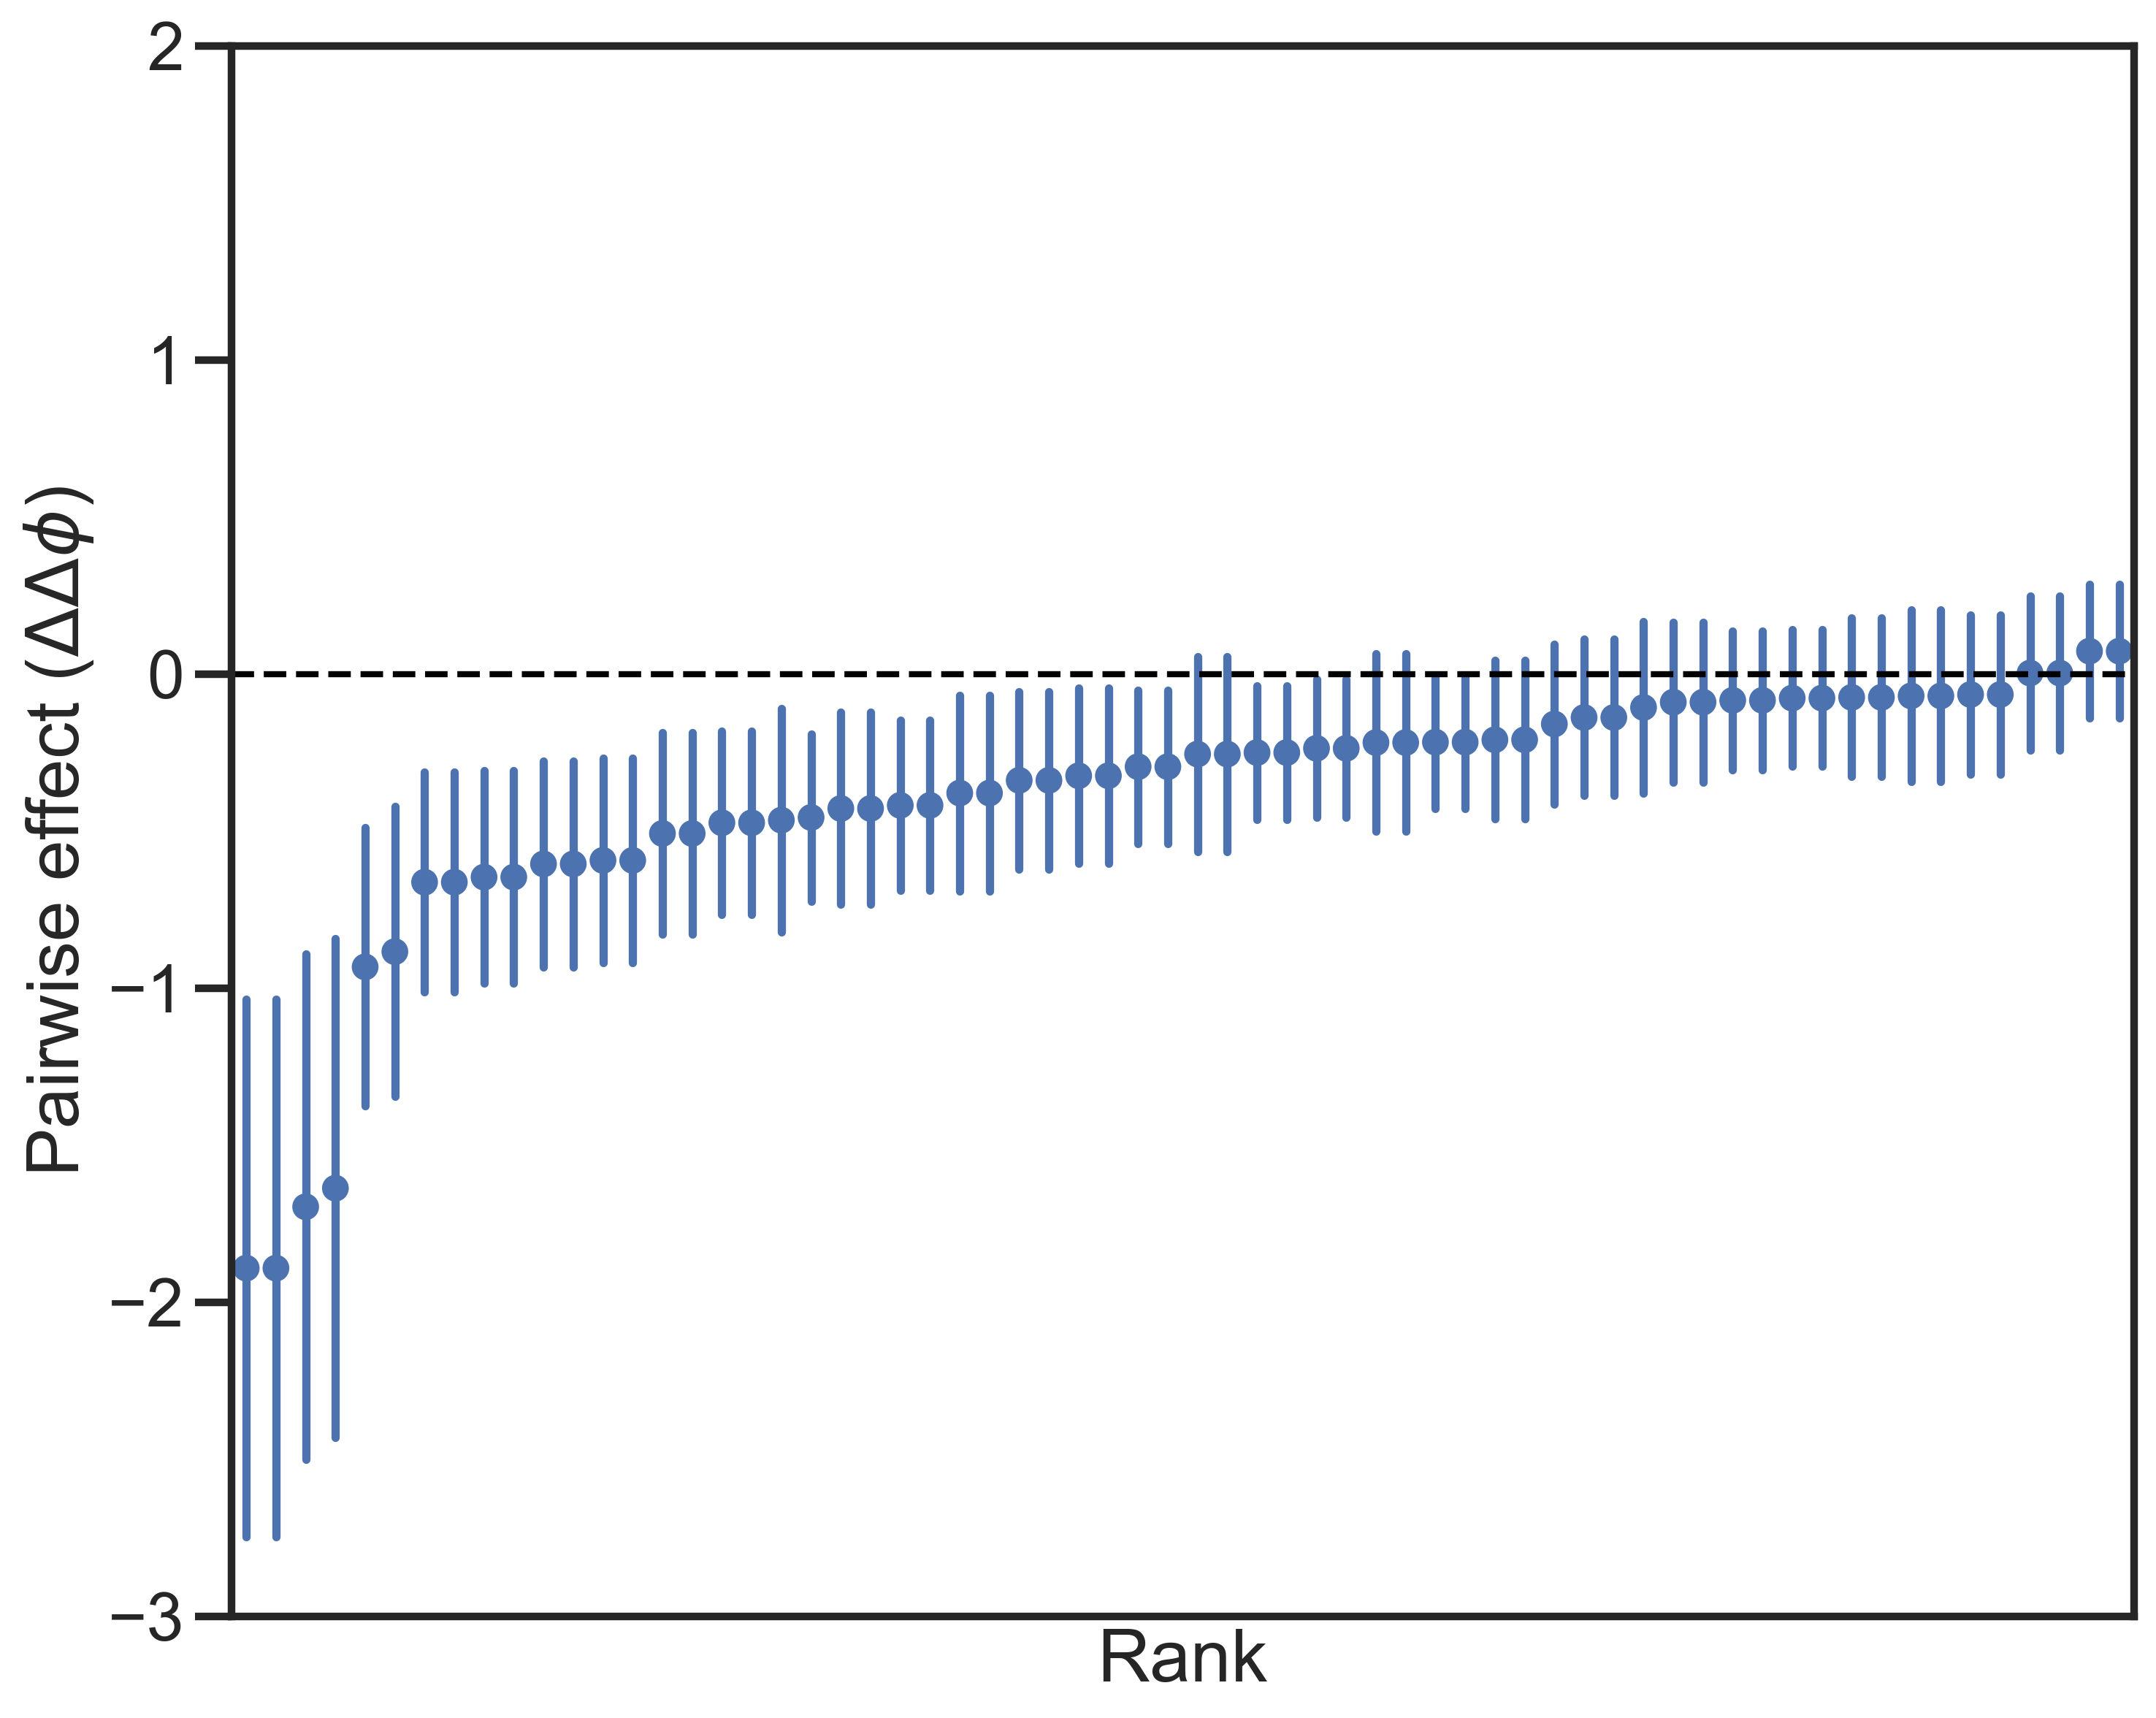

In [109]:
# Plot pairwise interaction uncertainties
fig, ax = plt.subplots(figsize=[10, 8])
# sns.set(rc={"figure.dpi":300, 'savefig.dpi':300}, font_scale = 1)
sns.set_theme(style = "ticks")
sns.set_context('notebook')

sns.pointplot(data=df_sorted, join = False, errorbar="sd")

# ax.set(xlabel = 'Rank', ylabel = 'mean pairwise effect ($\Delta \Delta \phi$)', )
plt.xlabel("Rank", fontsize = 24, font = "Arial")
plt.ylabel("Pairwise effect ($\Delta \Delta \phi$)", fontsize = 24, font = "Arial")
ax.tick_params(bottom=False, labelbottom=False)
ax.set_ylim([-3, 2.0])
plt.axhline(0, color = 'black', linestyle = "--", lw = 2)
plt.tight_layout()
fig.savefig('figs2I.tif', dpi=300, format='tif', bbox_inches = 'tight')

# CRX, NEUROD1, NRL, RORB, MAZ (CDNRM) library - load model files

This is new data for this paper. Model files in `saved_models/` begin with `CDNRM_`.

In [ ]:
# Iterate over types of G-P maps
gpmap_types = ['additive','neighbor','pairwise','blackbox']

# Create list of model names
model_names = [f'CDNRM_{gpmap_type}_ge_{i}' for gpmap_type in gpmap_types for i in range(50)]

# Load models into a dictionary indexed by model name
cdnrm_model_dict = {name:mavenn.load('saved_models/' + name) for name in model_names}

# Figure S3A

In [ ]:
# Compute predictive information

# Fill out dataframe containing values to plot
# This dataframe will then be used by seaborn's barplot() function
Test_data_file = open("saved_models/CDNRM_test.pkl", "rb")
cdnrm_test_df = pickle.load(Test_data_file)
Test_data_file.close()
cdnrm_info_df = pd.DataFrame(columns=['name', 'gpmap', 'metric', 'I', 'dI'], index = ["additive", "neighbor", "pairwise", "blackbox"])
for j in range(10):
    for i in range(50):
        for gpmap_type in gpmap_types:

            # Get model
            name = f'CDNRM_{gpmap_type}_ge_{i}'
            model = cdnrm_model_dict[name]

            # Compute variational information on test data
            #I_var, dI_var =  model.I_variational(x=test_df['Sequence'], y=test_df['Expression'])
            #row = {'name':name,
            #       'gpmap':gpmap_type,
            #       'metric':'I_var',
            #       'I':I_var,
            #       'dI':dI_var}
            #info_df = info_df.append(row, ignore_index=True)

            # Compute predictive information on test data
            I_pred, dI_pred = model.I_predictive(x=cdnrm_test_df['Sequence'], y=cdnrm_test_df['Expression'])
            row = {'name':name,
                   'gpmap':gpmap_type,
                   'metric':'I_pred',
                    'I':I_pred,
                   'dI':dI_pred}
            if pd.isna(cdnrm_info_df.loc[gpmap_type, "I"]) or I_pred > cdnrm_info_df.loc[gpmap_type, "I"]:
                cdnrm_info_df.loc[gpmap_type] = row

# Print dataframe
print('Contents of info_df:', cdnrm_info_df, sep='\n')

In [ ]:
# Plot predictive information
# Create figure
fig, ax = plt.subplots(figsize=[8, 6])
sns.set_theme(style = "ticks")
sns.set_context('poster')

# Plot bars
sns.barplot(ax=ax,
            data=cdnrm_info_df,
            hue='metric',
            x='gpmap',
            y='I')

# Plot errorbars
x = np.array([[x] for x in range(4)]).ravel()
ax.errorbar(x=x,
            y=cdnrm_info_df['I'].values,
            yerr=cdnrm_info_df['dI'].values,
            color='k', capsize=3, linestyle='none',
            elinewidth=2, capthick=2, solid_capstyle='round')

ax.set(xlabel = 'Model type', ylabel = 'Predictive information (bits)' )
ax.set_xlabel('model type')
ax.set_xlim([-.5, 3.5])
ax.set_ylim([0, 3])
plt.legend([],[], frameon=False)

plt.tight_layout()
fig.savefig('figS3a.fivepredInfo.tif', dpi=300, format='tif', bbox_inches = 'tight')

# Figure 3B

In [ ]:
# Plot latent phenotype vs observed activity

sns.set_theme(style="ticks")
sns.set_context('poster')

# Create figure and axes for plotting
fig, ax = plt.subplots(1,1,figsize=[8,8])

# Loop over models
#for ax, name in zip(axs, ['all_promoters_pairwise_ge']):

name = "CDNRM_pairwise_ge_7"
# Get model
model = cdnrm_model_dict[name]

# Get test data y values
y_test = cdnrm_test_df['Expression']

# Compute phi on test data
phi_test = model.x_to_phi(cdnrm_test_df['Sequence'])

## Set phi lims and create a grid in phi space
phi_lim = [min(phi_test)-.5, max(phi_test)+.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Compute yhat for each phi gridpoint
yhat_grid = model.phi_to_yhat(phi_grid)

# Compute 95% CI for each yhat
q = [0.025, 0.975]
yqs_grid = model.yhat_to_yq(yhat_grid, q=q)

# Plote 95% confidence interval
ax.fill_between(phi_grid, yqs_grid[:, 0], yqs_grid[:, 1],
                alpha=0.2, color='C1', lw=0, label='95% CI')

# Plot GE nonlinearity
ax.plot(phi_grid, yhat_grid,
        linewidth=3, color='C1', label='nonlinearity')

#scipy.stats.pearsonr(model.phi_to_yhat(phi_test), y_test)

# Plot scatter of phi and y values.
ax.scatter(phi_test, y_test,
            color='C0', s=10, alpha=.5, label= 'test data', zorder=+100)

# Plot basal
plt.plot(phi_lim, [0, 0], "--", label='basal activity')

# Style plot
ax.set_xlim(phi_lim)
ax.set_xlabel('Latent phenotype ($\phi$)')
ax.set_ylim([-2,5.5])
ax.set_ylabel('Observed activity ($y$)')
#ax.set_title(f'Pairwise model', fontsize = 36, font = "Arial")
ax.legend(loc='lower right', fontsize = 16, borderaxespad = 0.2, handletextpad=0.1)

fig.tight_layout()
fig.savefig('fig3b.fivenonlinearity.tif', dpi=300, format='tif', bbox_inches = 'tight')

# Figure 3C

In [ ]:
# Plot predicted vs observed activity

sns.set_theme(style="ticks")
sns.set_context('poster')

# Create figure and axes for plotting
fig, ax = plt.subplots(1,1,figsize=[8,8])

# Loop over models
#for ax, name in zip(axs, ['all_promoters_pairwise_ge']):

name = "CDNRM_pairwise_ge_7"
# Get model
model = cdnrm_model_dict[name]

# Get test data y values
y_test = cdnrm_test_df['Expression']

# Compute phi on test data
phi_test = model.x_to_phi(cdnrm_test_df['Sequence'])
yhat_test = model.phi_to_yhat(phi_test)

## Set phi lims and create a grid in phi space
phi_lim = [min(phi_test)-.5, max(phi_test)+.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Compute yhat for each phi gridpoint
yhat_grid = model.phi_to_yhat(phi_grid)

# Compute 95% CI for each yhat
q = [0.025, 0.975]
yqs_grid = model.yhat_to_yq(yhat_grid, q=q)

# Plote 95% confidence interval
ax.fill_between(yhat_grid, yqs_grid[:, 0], yqs_grid[:, 1],
                alpha=0.1, color='C1', lw=0, label='95% CI')

# Plot x=y line
ax.plot(yhat_grid, yhat_grid,
        linewidth=3, color='C1', label='X = Y')

#scipy.stats.pearsonr(model.phi_to_yhat(phi_test), y_test)

# Plot scatter of phi and y values.
ax.scatter(yhat_test, y_test,
            color='C0', s=10, alpha=0.5, label= 'test data', zorder=+100)

# Plot basal
plt.plot([min(yhat_test), max(yhat_test)], [0, 0], "--", label = "basal activity")

# Style plot
ax.set_xlim([min(yhat_test), max(yhat_test)])
ax.set_xlabel('Predicted activity ($y\u0302$)')
ax.set_ylim([-2,5.5])
ax.set_ylabel('Observed activity ($y$)')
#ax.set_title(f'Test set', fontsize = 36, font = "Arial")
ax.text(0.02,0.98, "Pearson $\it{r}$ = " + str(scipy.stats.pearsonr(yhat_test, y_test)[0])[0:5], ha="left", va="top", transform=ax.transAxes, fontsize = 24)
ax.legend(loc='lower right', fontsize = 16, borderaxespad = 0.2, handletextpad=0.1)

fig.tight_layout()
fig.savefig('fig3c.obsVpred.tif', dpi=300, format='tif', bbox_inches = 'tight')

# Figure S3B

In [ ]:
# Focus on pairwise model
model = cdnrm_model_dict['CDNRM_pairwise_ge_7']

# Retrieve G-P map parameter dict and view dict keys
theta_dict = model.get_theta(gauge="uniform")
theta_dict.keys()

In [ ]:
site_letters = ['C', 'c', 'x', 'D', 'd', 'N', 'n', 'R', 'r', 'M', 'm']

# Get pairwise parameters from theta_dict
theta_lclc = theta_dict['theta_lclc']

sns.set_theme(style="ticks")
sns.set_context('poster')
# Create fig and ax objects
fig, ax = plt.subplots(figsize=[30,15])

# Draw heatmap
ax, cb = mavenn.heatmap_pairwise(values=theta_lclc,
                                 alphabet=site_letters,
                                 ax=ax,
                                 gpmap_type='pairwise',
                                 cmap_size='3%', cmap = "bwr")

# Style heatmap
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels([f'{x:+d}' for x in range(-5,0) if x!=0])
ax.set_xlabel('binding site position', labelpad=5, fontsize = 42)

# Style colorbar
cb.set_label('pairwise effect ($\Delta \Delta \phi$)',
             labelpad=15, ha='center', va='center', rotation=-90)
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')

fig.savefig('figS3b.fiveHeatmap.tif', dpi=300, format='tif', bbox_inches = 'tight')

# Figure 3E

In [ ]:
# Make boxplots showing distributions of interaction terms

x = np.linspace(1, 11, 11)

#theta_dict['theta_lclc'].shape
TF_TF_interactions = np.transpose(theta_dict['theta_lclc'], axes = (1, 3, 0, 2))
#CRX_high = np.concatenate((TF_TF_interactions[0], [TF_TF_interactions[0, 0]])).flatten()
CRX_high = TF_TF_interactions[0, 0].flatten()
#CRX_med = np.concatenate((TF_TF_interactions[1], [TF_TF_interactions[0, 1]])).flatten()
CRX_med = np.concatenate((TF_TF_interactions[1, 0], TF_TF_interactions[0, 1])).flatten()
#CRX_low = np.concatenate((TF_TF_interactions[2], [TF_TF_interactions[0, 2]])).flatten()
CRX_low = np.concatenate((TF_TF_interactions[2, 0], TF_TF_interactions[0, 2])).flatten()

TF_TF_interactions_flattened = [CRX_high[np.logical_not(np.isnan(CRX_high))],
                               CRX_med[np.logical_not(np.isnan(CRX_med))],
                               CRX_low[np.logical_not(np.isnan(CRX_low))]]

for i in range(3, 11):    
    TF = np.concatenate((TF_TF_interactions[i, 0], TF_TF_interactions[0, i])).flatten()
    TF_TF_interactions_flattened.append(TF[np.logical_not(np.isnan(TF))])
    
sns.set_theme(style="ticks")
sns.set_context('poster')
fig, ax = plt.subplots(figsize=(8, 8))

sns.boxplot(TF_TF_interactions_flattened, color = 'steelblue')
plt.xticks(x, ["$\mathregular{CRX^{high}}$", "$\mathregular{CRX^{med}}$", "$\mathregular{CRX^{low}}$", 
                           "$\mathregular{NeuroD1^{high}}$", "$\mathregular{NeuroD1^{med}}$", 
                           "$\mathregular{NRL^{high}}$", "$\mathregular{NRL^{med}}$", 
                           "$\mathregular{RORB^{high}}$", "$\mathregular{RORB^{med}}$", 
                           "$\mathregular{MAZ^{high}}$", "$\mathregular{MAZ^{med}}$"], rotation=90)
plt.axhline(0, linestyle = "--", label = "No interaction", color = 'black', zorder=+100)
ax.legend(loc='lower right', fontsize = 18, borderaxespad = 0.2, handletextpad=0.1, )
ax.set_ylabel('pairwise effect with $\mathregular{CRX^{high}}$ ($\Delta \Delta \phi$)')
plt.show()

fig.savefig('fig3e.interactions.tif', dpi=300, format='tif', bbox_inches = 'tight')

# Figure 3D

In [ ]:
# Compute average interaction strengths

Average_interactions = []
for i in range(len(TF_TF_interactions)):
    Average_interactions.append([])
    for j in range(len(TF_TF_interactions)):   
        All_pairs = TF_TF_interactions[i][j].flatten()
        Average_interactions[i].append(np.mean(All_pairs[np.logical_not(np.isnan(All_pairs))]))
Average_interactions

In [ ]:
# Get additive contributions

# Get logo dataframe
logo_df = theta_dict['logomaker_df']

# Set NaN parameters to zero
logo_df.fillna(0, inplace=True)

TF_additive = (logo_df.iloc[0] + logo_df.iloc[1] + logo_df.iloc[2] + logo_df.iloc[3])/4

TF_effects = np.insert(list(Average_interactions), 0, [np.asarray(TF_additive)], axis = 0)

In [ ]:
# Plot heatmap of average interaction terms

fig, ax = plt.subplots(figsize=[12,10])

sns.heatmap(np.asarray(TF_effects), cmap = 'bwr', center = 0, 
            xticklabels = ["$\mathregular{CRX^{high}}$", "$\mathregular{CRX^{med}}$", "$\mathregular{CRX^{low}}$", 
                           "$\mathregular{NeuroD1^{high}}$", "$\mathregular{NeuroD1^{med}}$", 
                           "$\mathregular{NRL^{high}}$", "$\mathregular{NRL^{med}}$", 
                           "$\mathregular{RORB^{high}}$", "$\mathregular{RORB^{med}}$", 
                           "$\mathregular{MAZ^{high}}$", "$\mathregular{MAZ^{med}}$"], 
            yticklabels = ["Additive", "$\mathregular{CRX^{high}}$", "$\mathregular{CRX^{med}}$", "$\mathregular{CRX^{low}}$", 
                           "$\mathregular{NeuroD1^{high}}$", "$\mathregular{NeuroD1^{med}}$", 
                           "$\mathregular{NRL^{high}}$", "$\mathregular{NRL^{med}}$", 
                           "$\mathregular{RORB^{high}}$", "$\mathregular{RORB^{med}}$", 
                           "$\mathregular{MAZ^{high}}$", "$\mathregular{MAZ^{med}}$"], vmin = -1, vmax = 1) #, vmin = -1, vmax = 1.5
plt.xlabel("3' site", fontsize = 36, font = "Arial")
plt.ylabel("5'site", fontsize = 36, font = "Arial")

plt.axhline(1, color = 'black', linestyle = "--", lw = 2.5)
plt.axhline(4, color = 'black', linestyle = "--", lw = 1.5)
plt.axhline(6, color = 'black', linestyle = "--", lw = 1.5)
plt.axhline(8, color = 'black', linestyle = "--", lw = 1.5)
plt.axhline(10, color = 'black', linestyle = "--", lw = 1.5)
plt.axvline(3, color = 'black', linestyle = "--", lw = 1.5)
plt.axvline(5, color = 'black', linestyle = "--", lw = 1.5)
plt.axvline(7, color = 'black', linestyle = "--", lw = 1.5)
plt.axvline(9, color = 'black', linestyle = "--", lw = 1.5)





plt.show()


fig.tight_layout()
fig.savefig('fig3d.avgHeatmap.tif', dpi=300, format='tif', bbox_inches = 'tight')

# Bootstrap parameter uncertainties

In [110]:
# load bootstrapped additive interactions
cdnrm_add_df = pd.read_csv('bootstrapped_models/CDNRM_bootstrap_additive.txt', sep = '\t', header = 0)

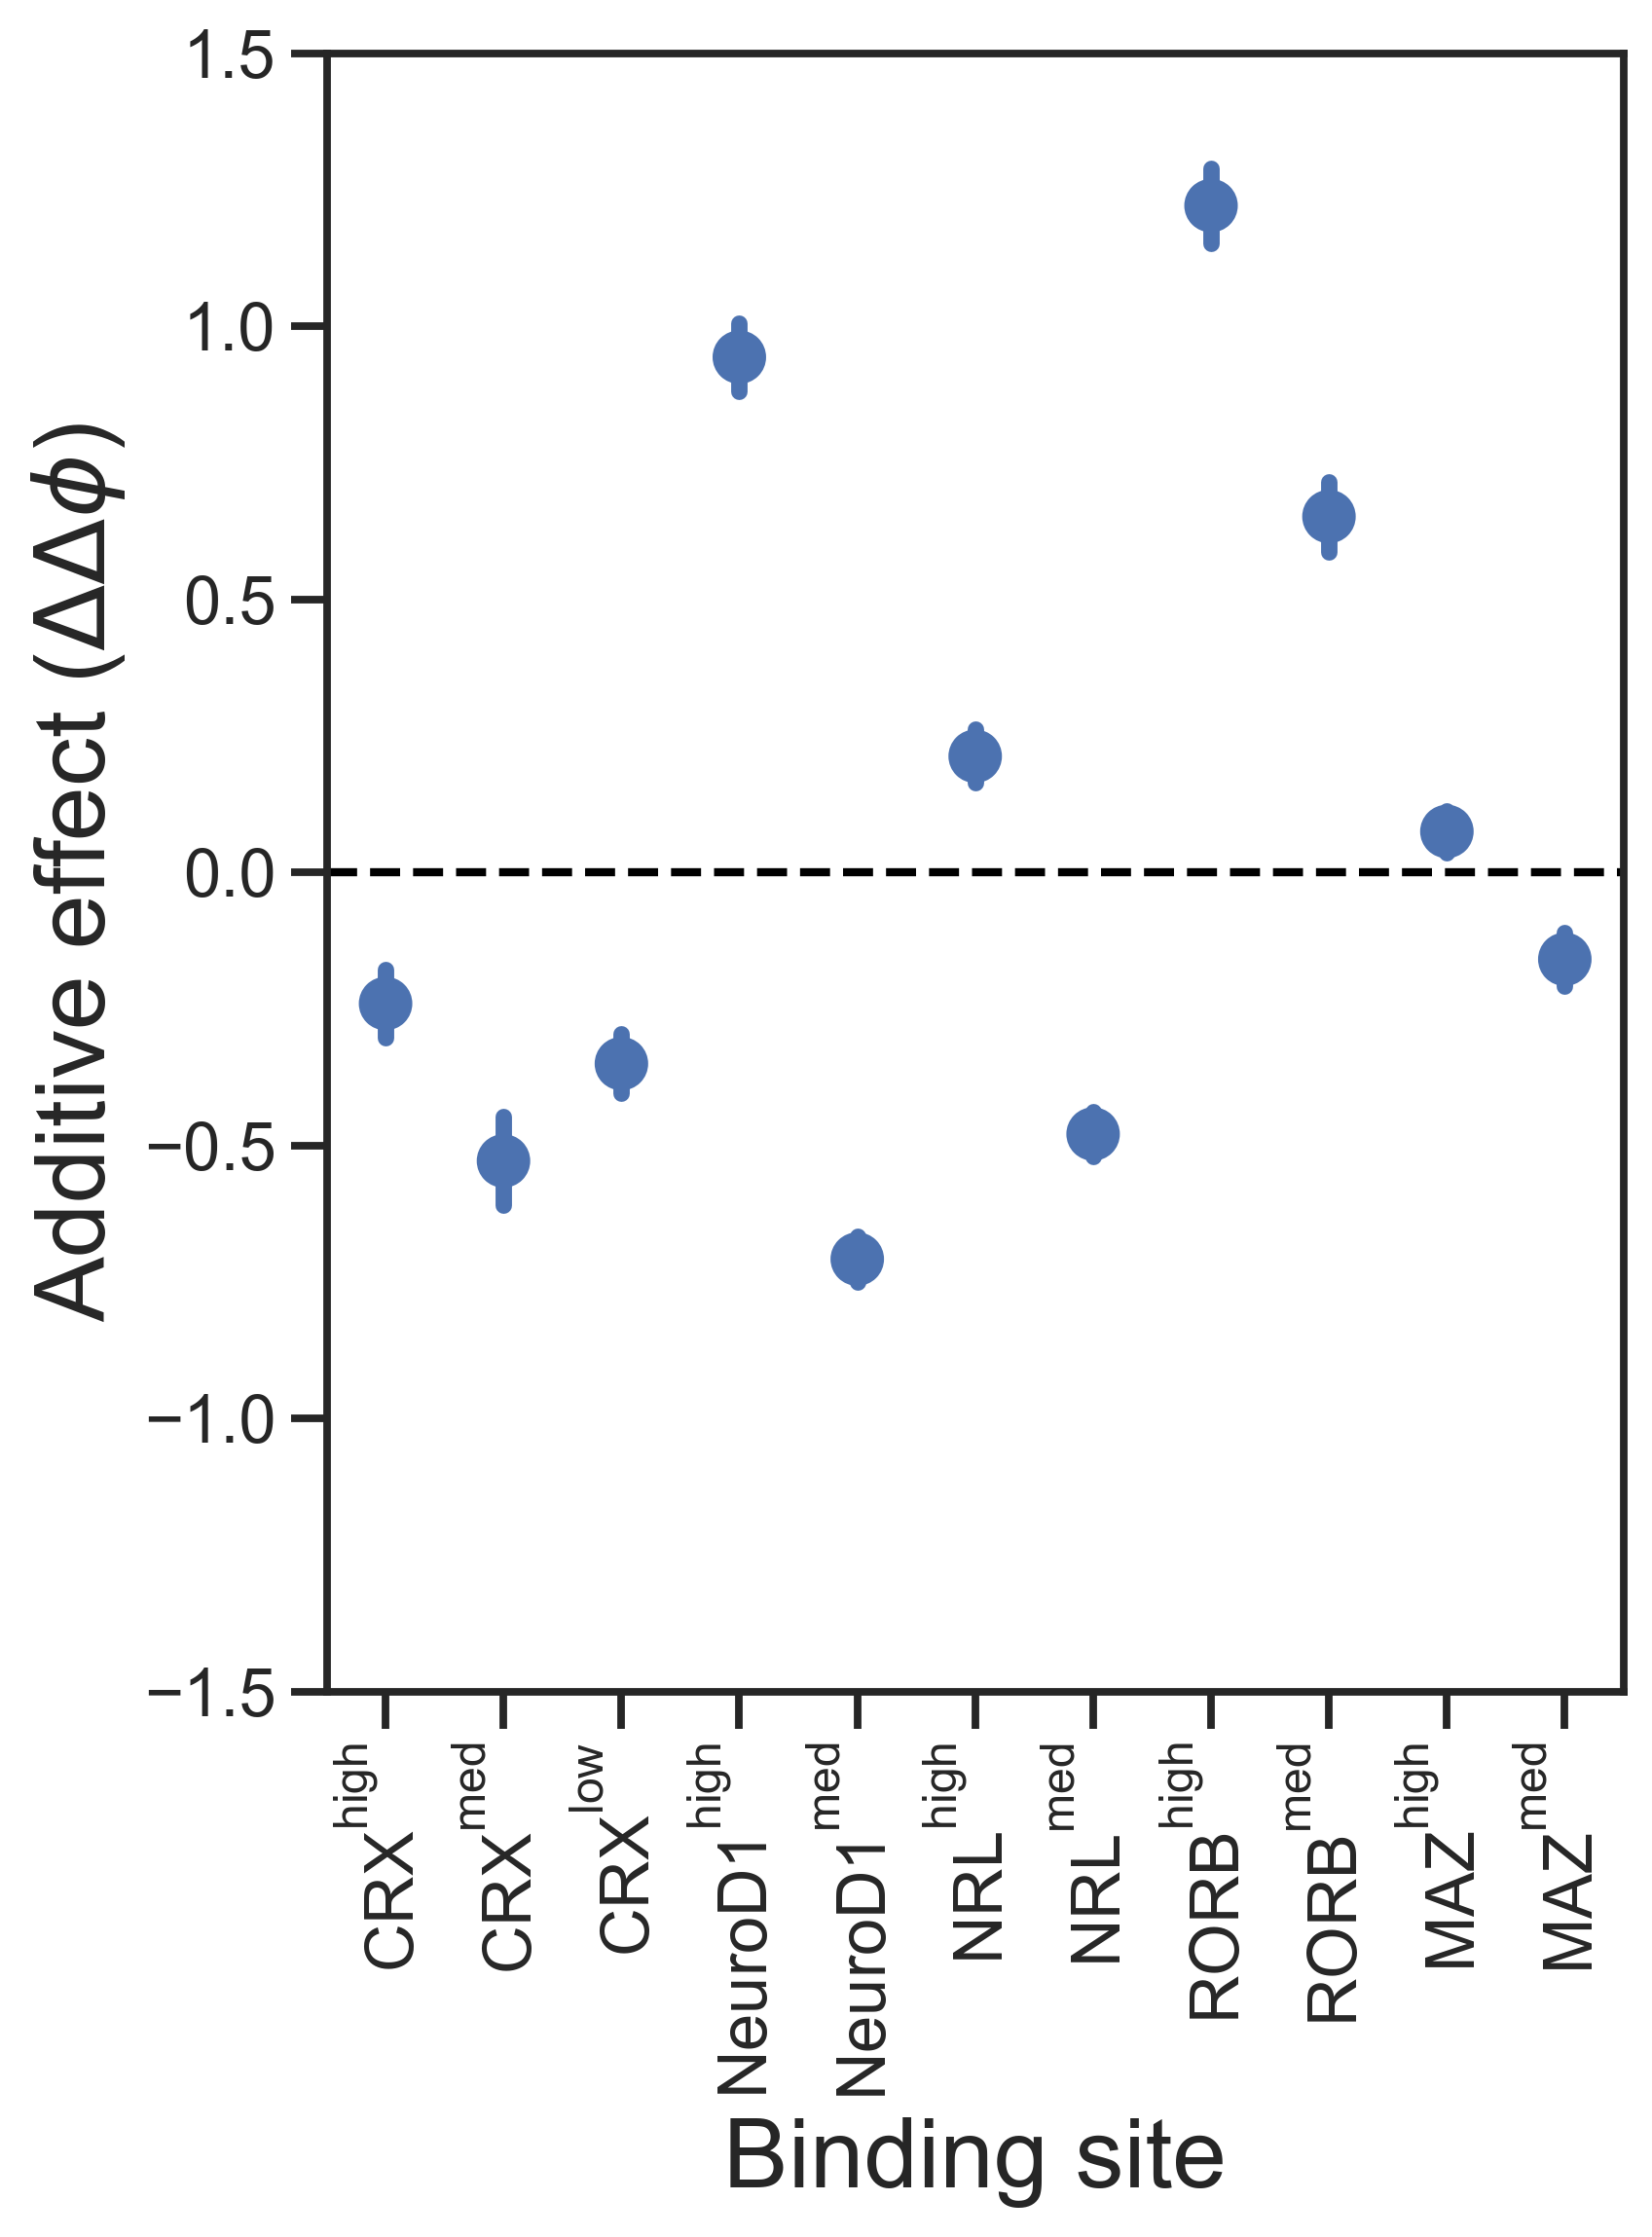

In [112]:
# Plot additive parameter uncertainties
fig, ax = plt.subplots(figsize=[6, 8])
sns.set_theme(style = "ticks")
sns.set_context('talk')

sns.pointplot(ax=ax,data=cdnrm_add_df, join = False, errorbar="sd")
# ax.set(xlabel = 'Binding site', ylabel = 'mean pairwise effect ($\Delta \Delta \phi$)' )
plt.xlabel("Binding site", fontsize = 24, font = "Arial")
plt.ylabel("Additive effect ($\Delta \Delta \phi$)", fontsize = 24, font = "Arial")
ax.set_ylim([-1.5, 1.5])
xtick_loc = ax.get_xticks()
ax.set_xticks(ticks=xtick_loc,labels =["$\mathregular{CRX^{high}}$", "$\mathregular{CRX^{med}}$", "$\mathregular{CRX^{low}}$", 
                           "$\mathregular{NeuroD1^{high}}$", "$\mathregular{NeuroD1^{med}}$", 
                           "$\mathregular{NRL^{high}}$", "$\mathregular{NRL^{med}}$", 
                           "$\mathregular{RORB^{high}}$", "$\mathregular{RORB^{med}}$", 
                           "$\mathregular{MAZ^{high}}$", "$\mathregular{MAZ^{med}}$"],
                         rotation = 90 )
plt.axhline(0, color = 'black', linestyle = "--", lw = 2)
plt.tight_layout()
fig.savefig('figS3C.tif', dpi=300, format='tif', bbox_inches = 'tight')

In [146]:
# Load and sort pairwise interactions by rank

filename = 'bootstrapped_models/CDNRM_boostrap_interactions.csv'

df = pd.read_csv(filename, sep = ',', header = None)
mean_df = df.mean(axis=0)
df = pd.concat([df, mean_df.to_frame().T], ignore_index=True)
df_T = df.T
df_T.sort_values(by=20, inplace = True, ignore_index=True)
df_sorted = df_T.T
df_sorted.drop([20], axis=0,inplace=True)

In [149]:
len(df_sorted.columns)

121

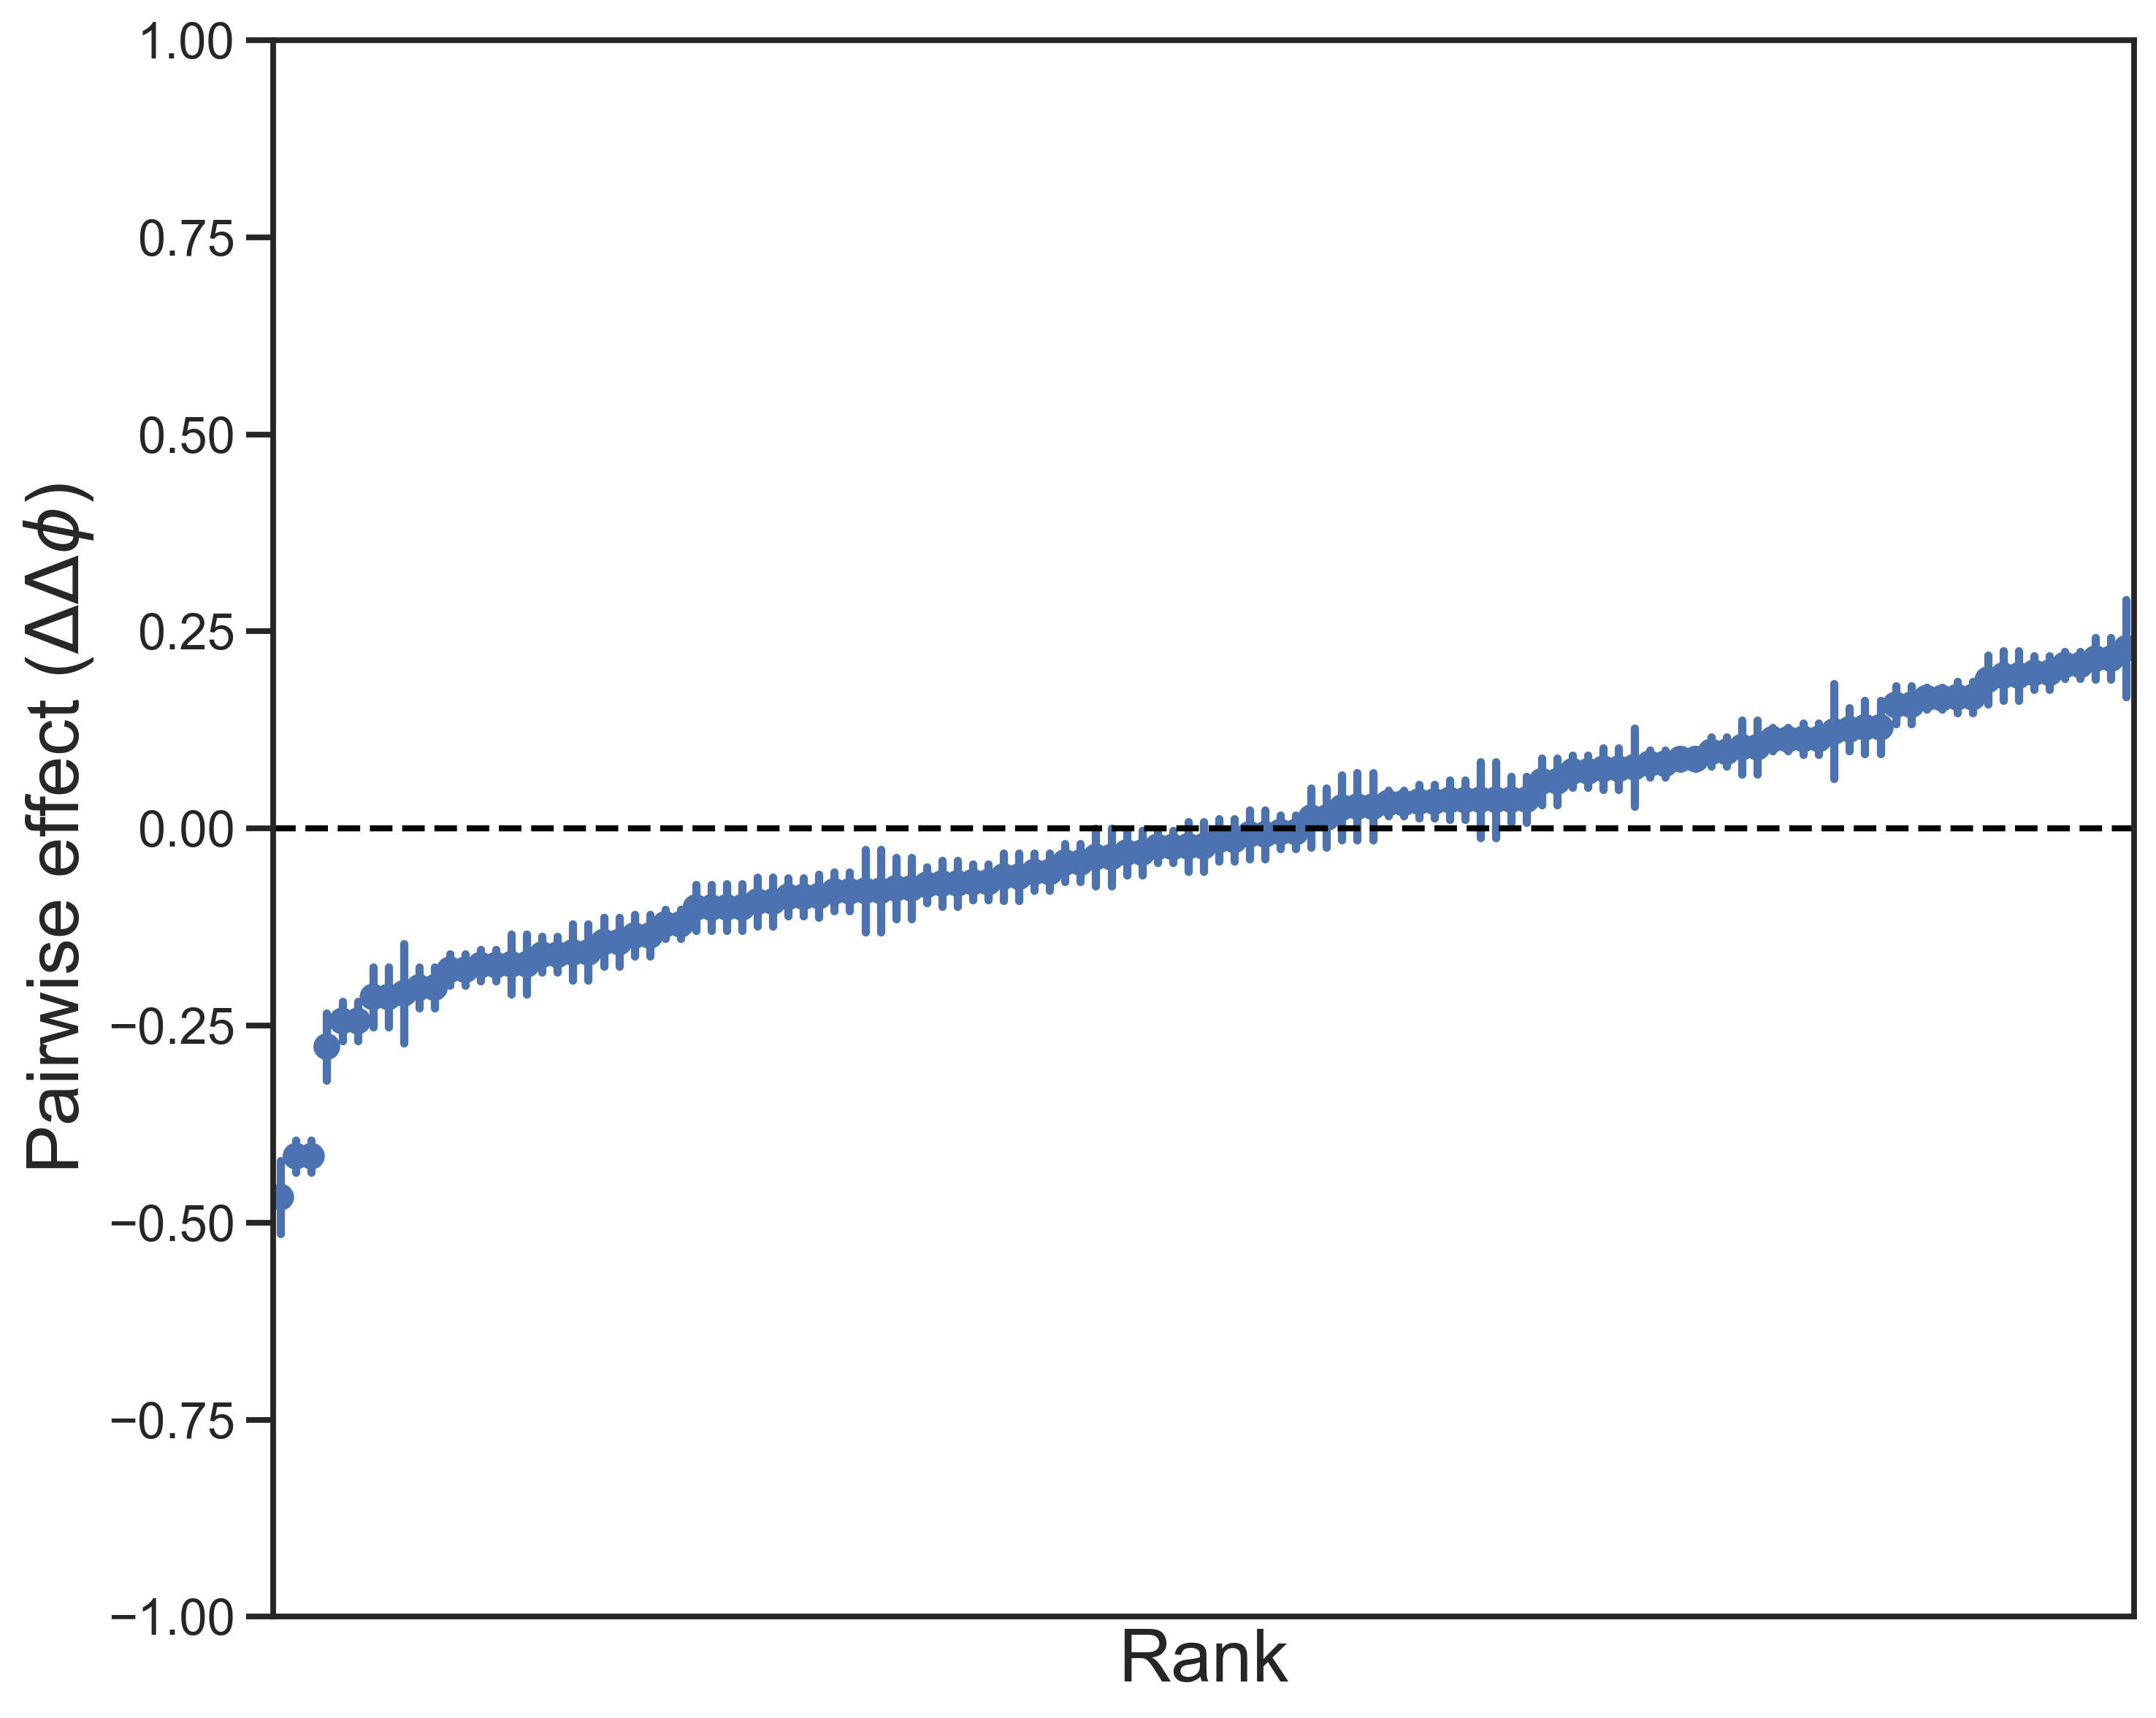

In [114]:
# Plot pairwise interaction uncertainties
fig, ax = plt.subplots(figsize=[10, 8])
# sns.set(rc={"figure.dpi":300, 'savefig.dpi':300}, font_scale = 1)
sns.set_theme(style = "ticks")
sns.set_context('notebook')

sns.pointplot(data=df_sorted, join = False, errorbar="sd")

# ax.set(xlabel = 'Rank', ylabel = 'mean pairwise effect ($\Delta \Delta \phi$)', )
plt.xlabel("Rank", fontsize = 24, font = "Arial")
plt.ylabel("Pairwise effect ($\Delta \Delta \phi$)", fontsize = 24, font = "Arial")
ax.tick_params(bottom=False, labelbottom=False)
ax.set_ylim([-1, 1])
plt.axhline(0, color = 'black', linestyle = "--", lw = 2)
plt.tight_layout()
fig.savefig('figs3D.tif', dpi=300, format='tif', bbox_inches = 'tight')

# Figure 4a Toy model of CRX + NRL

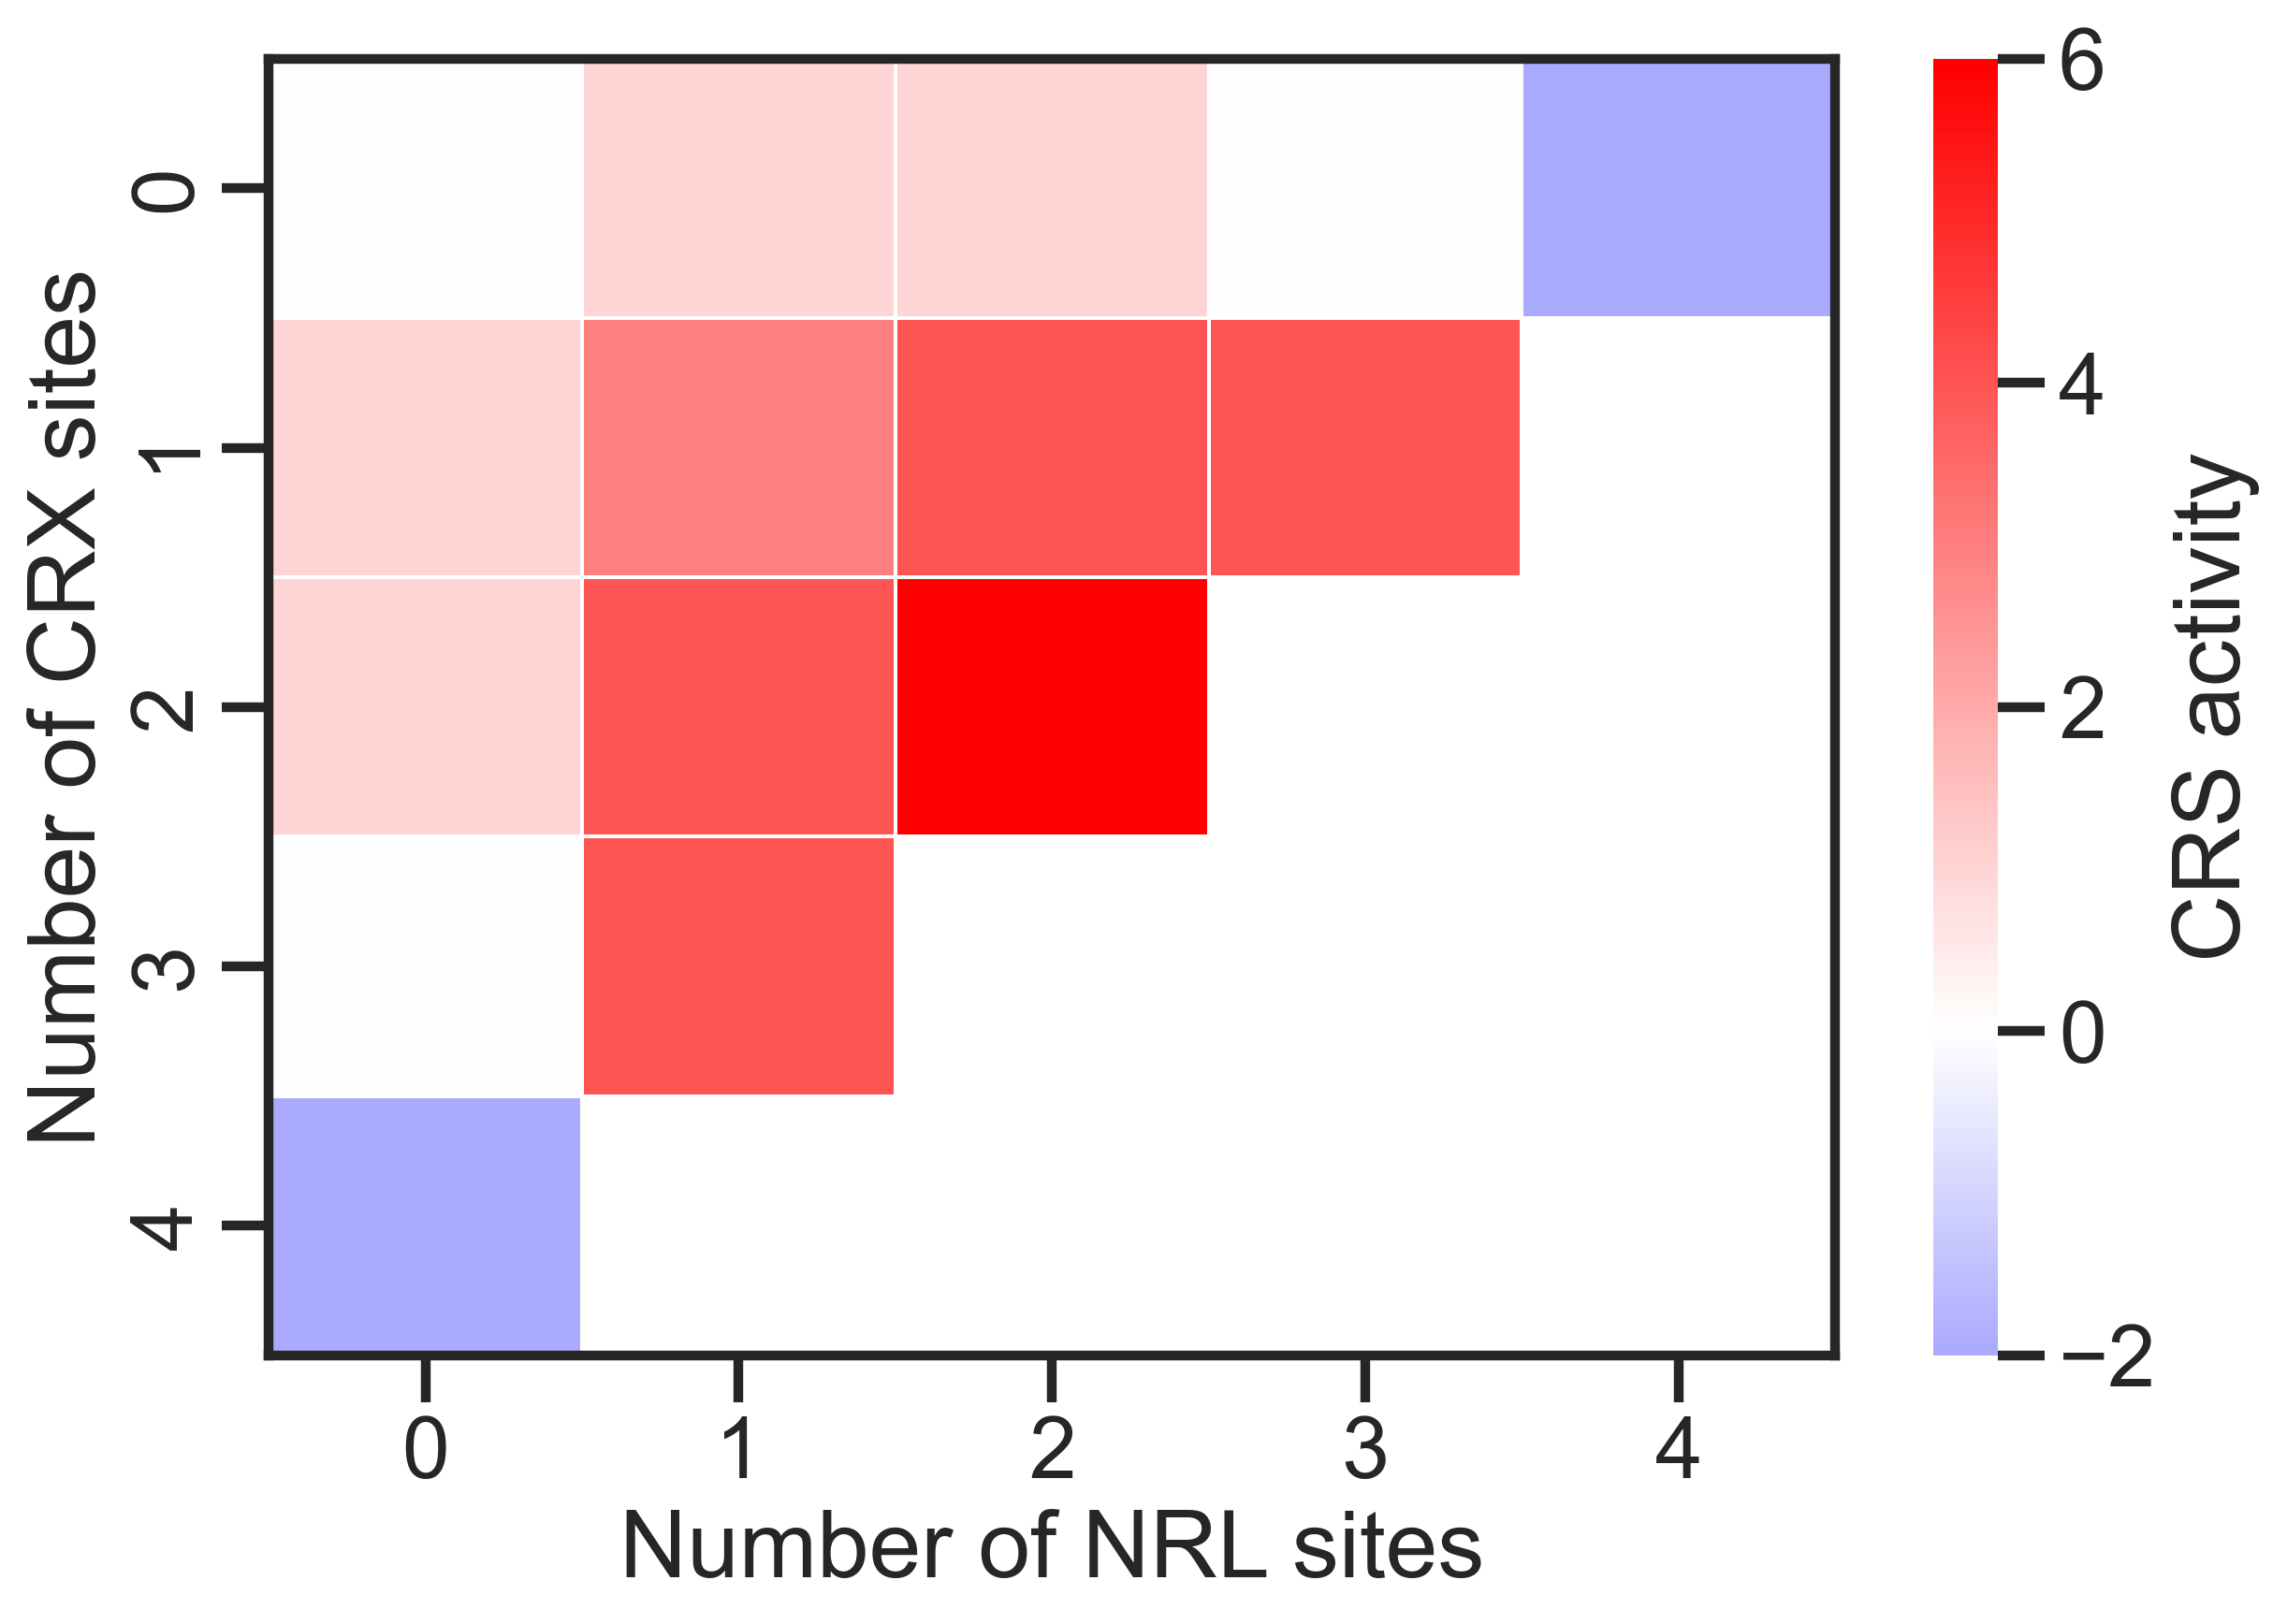

In [150]:
sns.set_theme(style="ticks")
sns.set_context('poster')
toy_data = pd.read_csv('data_files/fig4a.toy.model.csv')
toy_wide = toy_data.pivot(index = "CRX", columns = "NRL", values = "Activity")
# p = sns.diverging_palette(145, 300, s=60, as_cmap=True)
p = sns.diverging_palette(220, 20, as_cmap=True)
# p = sns.color_palette("vlag", as_cmap=True)

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(toy_wide, annot=False,  cmap='bwr', center = 0, linewidths=.5, ax=ax, cbar_kws = {'label': 'CRS activity'})
ax.set(ylabel = 'Number of CRX sites', xlabel = 'Number of NRL sites' )
for _, spine in ax.spines.items():
    spine.set_visible(True)

f.savefig('fig4a.heatmap.tif', dpi=300, format='tif', bbox_inches = 'tight')


# Figure 4B Toy model of 5-mers

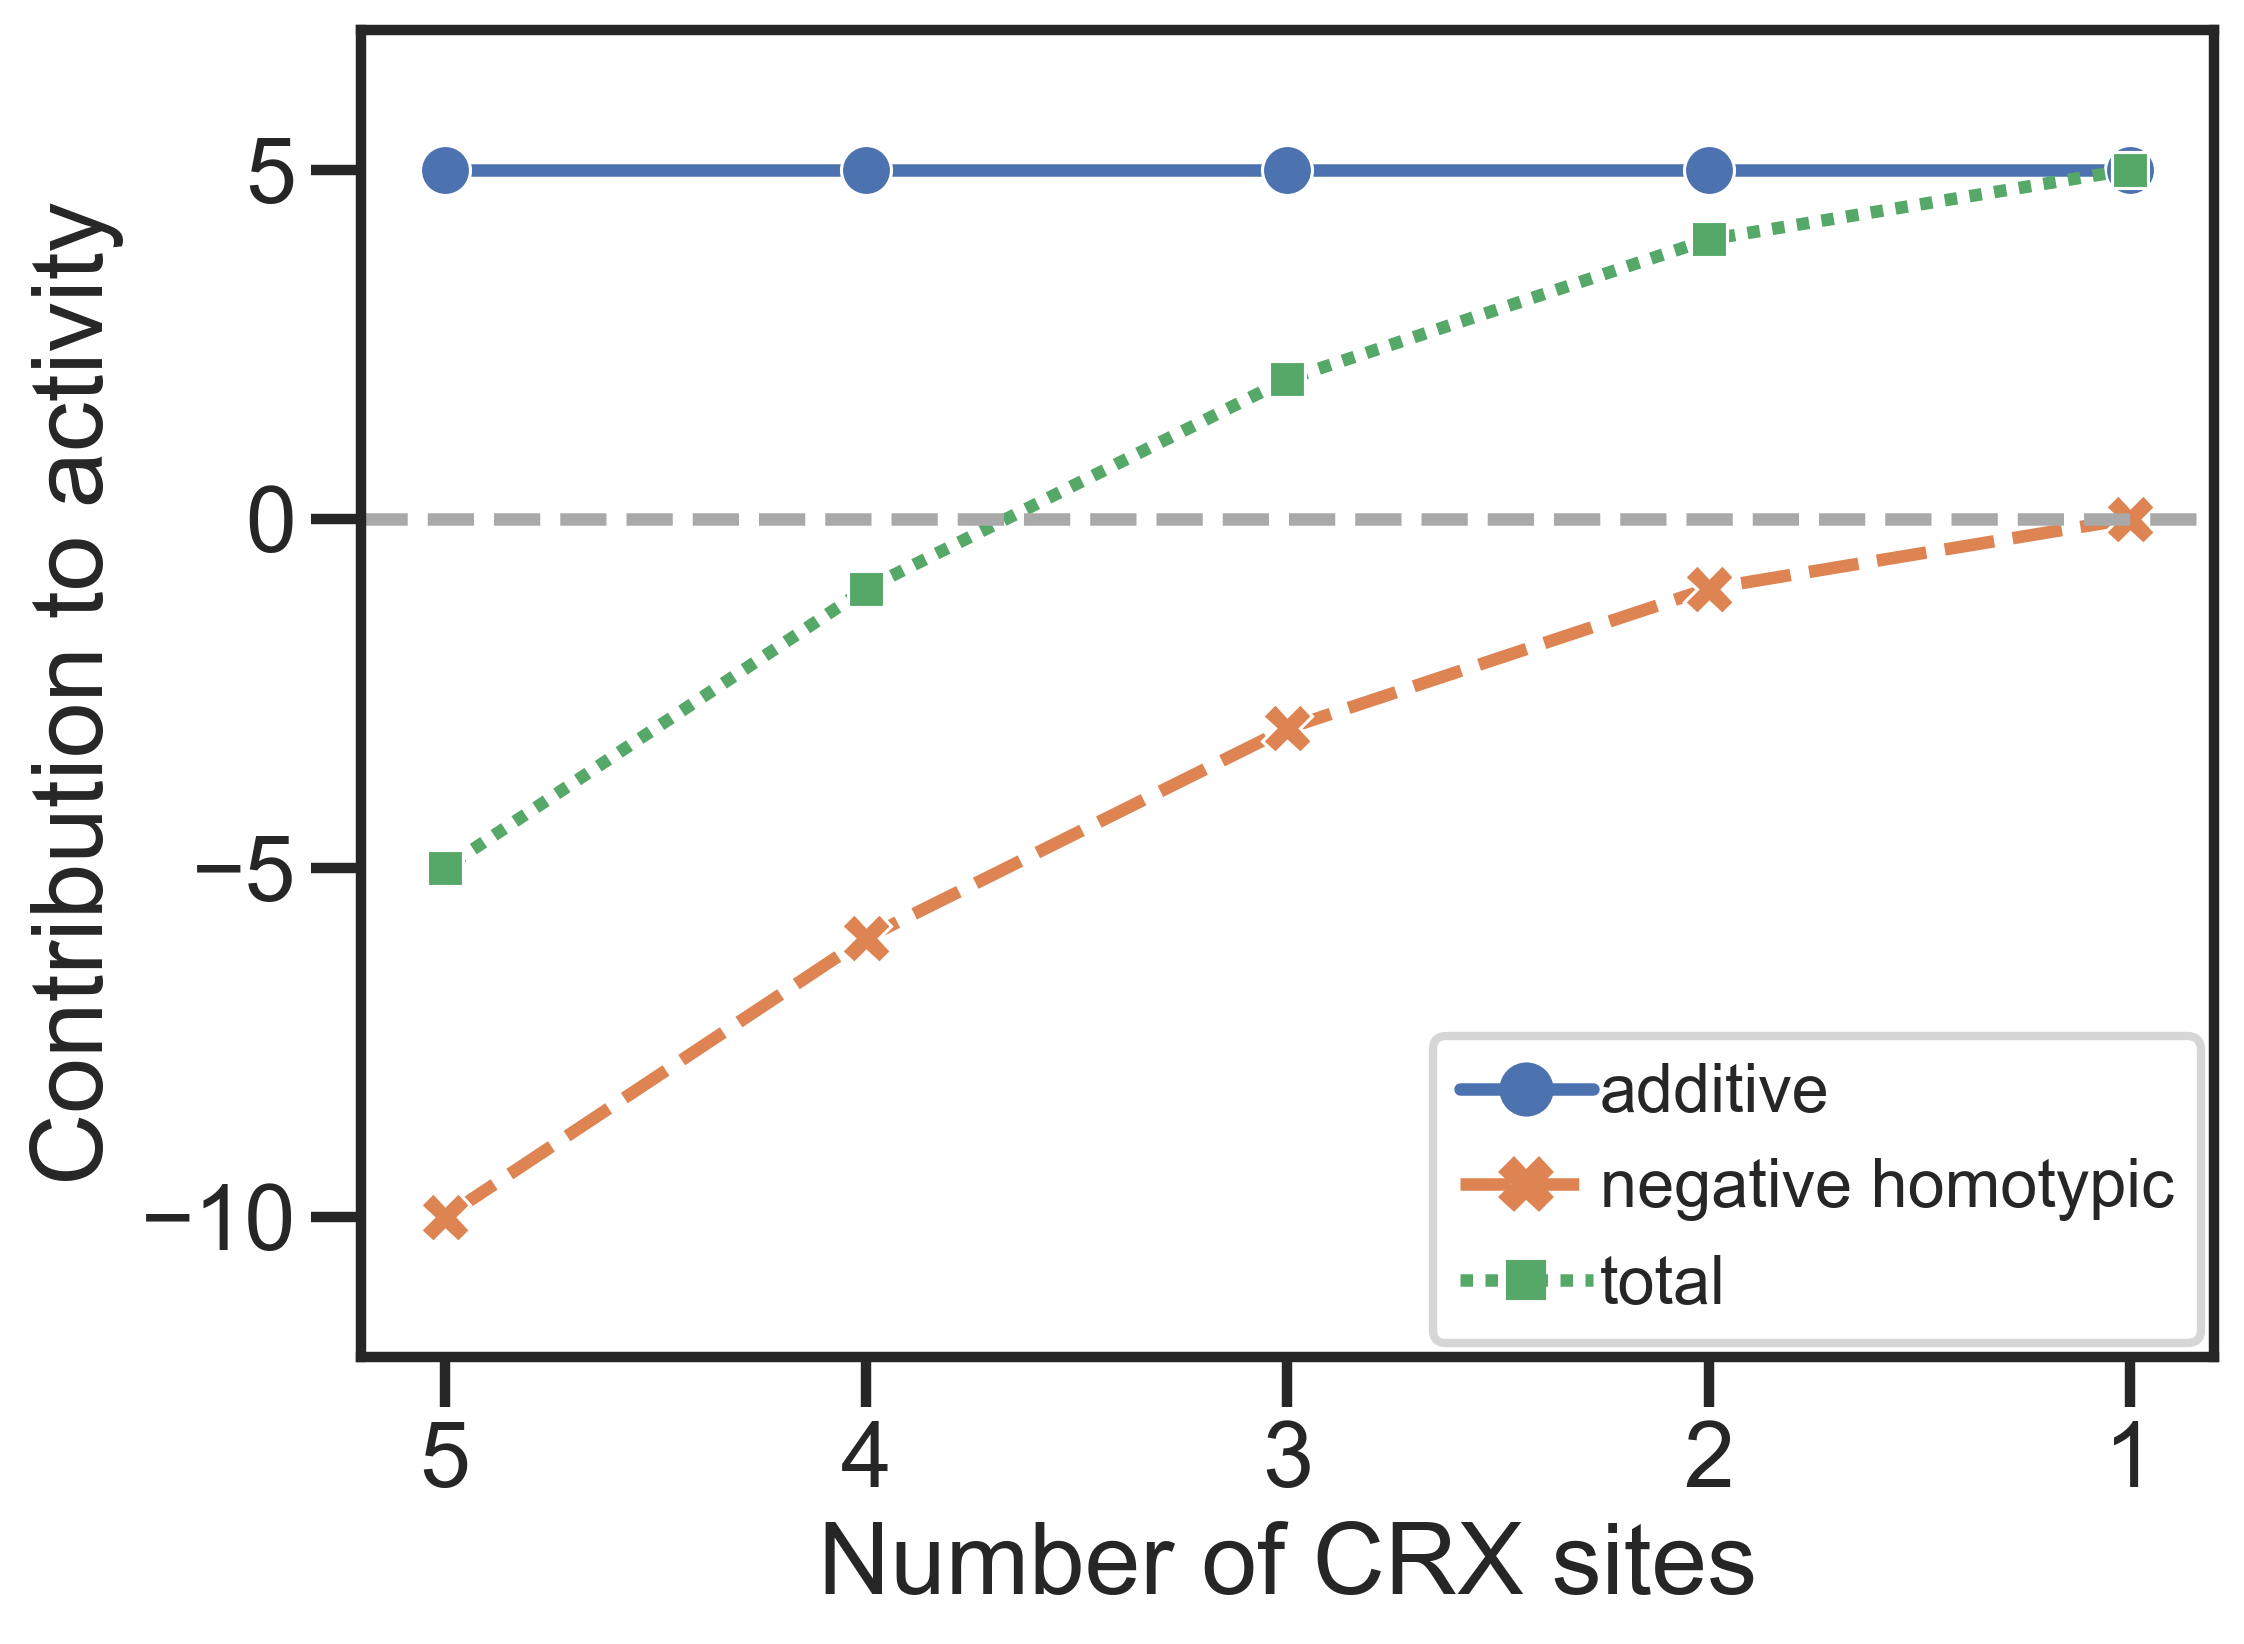

In [153]:
toy_long = pd.read_csv('data_files/fig4b.toy.additive.txt', sep = '\t')
toy_wide = toy_long.pivot(index="nCRX", columns = 'interaction', values = 'value')

sns.set_theme(style="ticks")
sns.set_context('poster')
sns.color_palette("Set2")

f, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(data = toy_wide, sort = False, markers = True, legend = True)



ax.set(xlabel = 'Number of CRX sites', ylabel = 'Contribution to activity' )
ax.invert_xaxis()
ax.set_ylim([-12, 7])
ax.axhline(0, linestyle = '--', color = 'darkgray')

#sns.despine(trim=True)
plt.tight_layout()
# plt.legend(title='', loc= 'lower right')
ax.legend(loc='lower right', fontsize = 16, borderaxespad = 0.2, handletextpad=0.1)

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
f.savefig('fig4b.tif', dpi=300, format='tif', bbox_inches = 'tight')

# Training history

In [23]:
# CRX-NRL wildtype

model = mavenn.load('saved_models/all_promoters_pairwise_ge_24')

Model loaded from these files:
	saved_models/all_promoters_pairwise_ge_24.pickle
	saved_models/all_promoters_pairwise_ge_24.h5


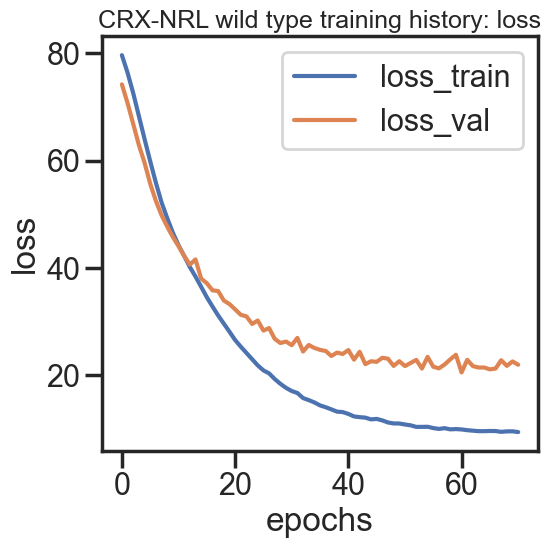

In [24]:
sns.set_theme(style="ticks")
sns.set_context('poster')
f, ax = plt.subplots(1,1,figsize=[6,6])

ax.plot(model.history['loss'],label=r'loss_train')
ax.plot(model.history['val_loss'],label=r'loss_val')

ax.set_xlabel('epochs')
ax.set_ylabel('loss')
ax.set_title('CRX-NRL wild type training history: loss', fontsize = 18)
ax.legend()
plt.tight_layout()

f.savefig('figS6.rev.WT.tif', dpi=300, format='tif', bbox_inches = 'tight')

In [26]:
model = mavenn.load('saved_models/crxnull_pairwise_ge_5')

Model loaded from these files:
	saved_models/crxnull_pairwise_ge_5.pickle
	saved_models/crxnull_pairwise_ge_5.h5


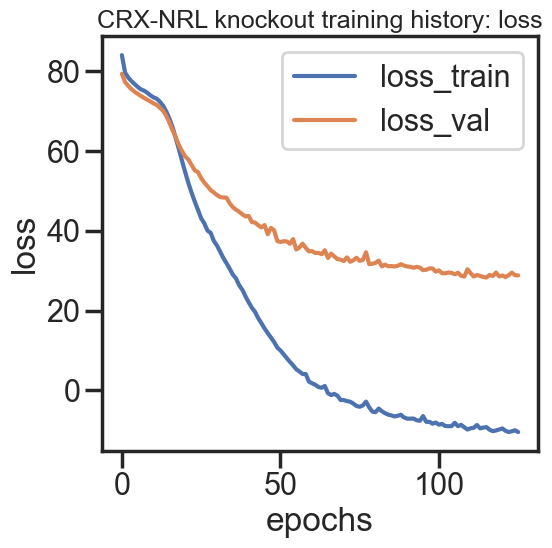

In [27]:
sns.set_theme(style="ticks")
sns.set_context('poster')
f, ax = plt.subplots(1,1,figsize=[6,6])

ax.plot(model.history['loss'],label=r'loss_train')
ax.plot(model.history['val_loss'],label=r'loss_val')

ax.set_xlabel('epochs')
ax.set_ylabel('loss')
ax.set_title('CRX-NRL knockout training history: loss', fontsize = 18)
ax.legend()
plt.tight_layout()

f.savefig('figS6.rev.null.tif', dpi=300, format='tif', bbox_inches = 'tight')

In [28]:
model = mavenn.load('saved_models/CDNRM_pairwise_ge_7')

Model loaded from these files:
	saved_models/CDNRM_pairwise_ge_7.pickle
	saved_models/CDNRM_pairwise_ge_7.h5


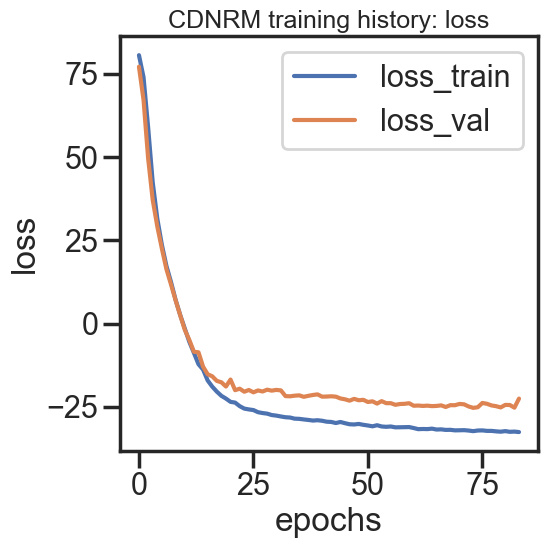

In [29]:
sns.set_theme(style="ticks")
sns.set_context('poster')
f, ax = plt.subplots(1,1,figsize=[6,6])

ax.plot(model.history['loss'],label=r'loss_train')
ax.plot(model.history['val_loss'],label=r'loss_val')

ax.set_xlabel('epochs')
ax.set_ylabel('loss')
ax.set_title('CDNRM training history: loss', fontsize = 18)
ax.legend()
plt.tight_layout()

f.savefig('figS6.rev.cdnrm.tif', dpi=300, format='tif', bbox_inches = 'tight')